In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import glob

import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
import json

## Task 1

In [2]:
def remove_characters(text: str) -> str:
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def get_text_files(path: str, N=0, shuffle=False) -> list:
    text_files = glob.glob(f"{path}/*.txt")
    if shuffle:
        random.shuffle(text_files)
    if N > 0:
        text_files = text_files[:N]
    return text_files

def get_text(text_files: list) -> list:
    text = []
    for text_file in text_files:
        with open(text_file, 'r', errors='ignore') as f:
            content = remove_characters(f.read())
            content = content.lower()
            text.append(content)
    return text

def tokenization(text):
    if type(text) == list:
        return [word_tokenize(t) for t in text]
    elif type(text) == str:
        return word_tokenize(text)
    return None

In [3]:
# Obtain raw data of N documents and tokenize
N = 15
directory = "./nasa"
text_files = get_text_files(directory, N=N, shuffle=False)
text = get_text(text_files)
tokenized_text = tokenization(text)
print(tokenized_text)

[['miniature', 'electronic', 'temperature', 'controller', 'a', 'miniature', 'electronic', 'temperature', 'controller', 'was', 'developed', 'at', 'nasa', 'langley', 'research', 'center', 'to', 'provide', 'a', 'constant', 'temperature', 'environment', 'for', 'transducers', 'and', 'electronics', 'in', 'the', 'flaps', 'and', 'slats', 'of', 'a', 'boeing', 'aircraft', 'new', 'packaging', 'technology', 'has', 'allowed', 'nasa', 'langley', 'to', 'build', 'a', 'miniature', 'controller', 'that', 'can', 'be', 'mounted', 'almost', 'anywhere', 'the', 'controller', 'also', 'provides', 'a', 'temperature', 'monitor', 'signal', 'allowing', 'the', 'user', 'to', 'verify', 'the', 'equipment', 'is', 'controlled', 'at', 'the', 'selected', 'temperature', 'miniature', 'electronic', 'temperature', 'controller', 'controller', 'installed', 'on', 'pressure', 'array', 'system', 'potential', 'commercial', 'uses', 'temperature', 'sensitive', 'electronics', 'and', 'transducers', 'limited', 'volume', 'applications', '

## Task 2

In [4]:
def stemmer(tokenized_text: list):
    ps = PorterStemmer()
    stemmed_text = []
    for doc in tokenized_text:
        stemmed_text.append([ps.stem(token) for token in doc])

    stemmed_dict = {}
    for doc in stemmed_text:
        for token in doc:
            if token in stemmed_dict:
                stemmed_dict[token] += 1
            else:
                stemmed_dict[token] = 1
    
    return stemmed_dict, stemmed_text

def get_top_stems(stemmed_dict: dict, n: int) -> list:
    sorted_items = sorted(stemmed_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_items[:n]

def plot_wordcloud(items: list):
    word_freq_dict = {word: freq for word, freq in items}
    font_path = "./US101.TTF"
    wordcloud = WordCloud(width=800, height=800, font_path=font_path).generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='none')
    plt.axis('off')
    plt.show()

def plot_tf_dist(items: list):
    word_freq_dict = {word: freq for word, freq in items}
    words = list(word_freq_dict.keys())
    freq = list(word_freq_dict.values())

    fig, ax = plt.subplots(figsize =(20, 20))
    ax.barh(words, freq)

    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 1)

    ax.invert_yaxis()

    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 20, fontweight ='bold', color ='grey')
    ax.set_title('Corpus word frequency')

    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.rcParams.update({'font.size': 20})
    plt.show()

In [5]:
# Stemming using PorterStemmer
stemmed_dict, stemmed_text = stemmer(tokenized_text) 

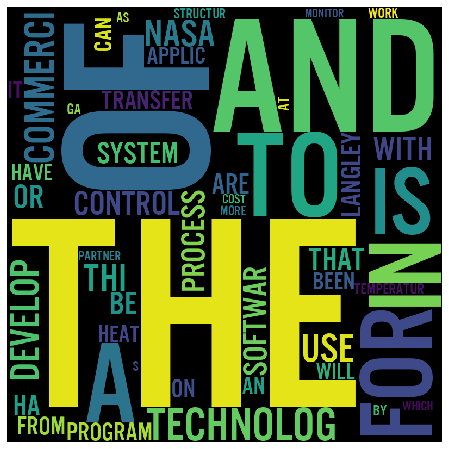

In [6]:
# Tag Clouds
N = 50
top_stems = get_top_stems(stemmed_dict, N)
plot_wordcloud(top_stems)

/tmp/ipykernel_317218/3924120663.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 1)


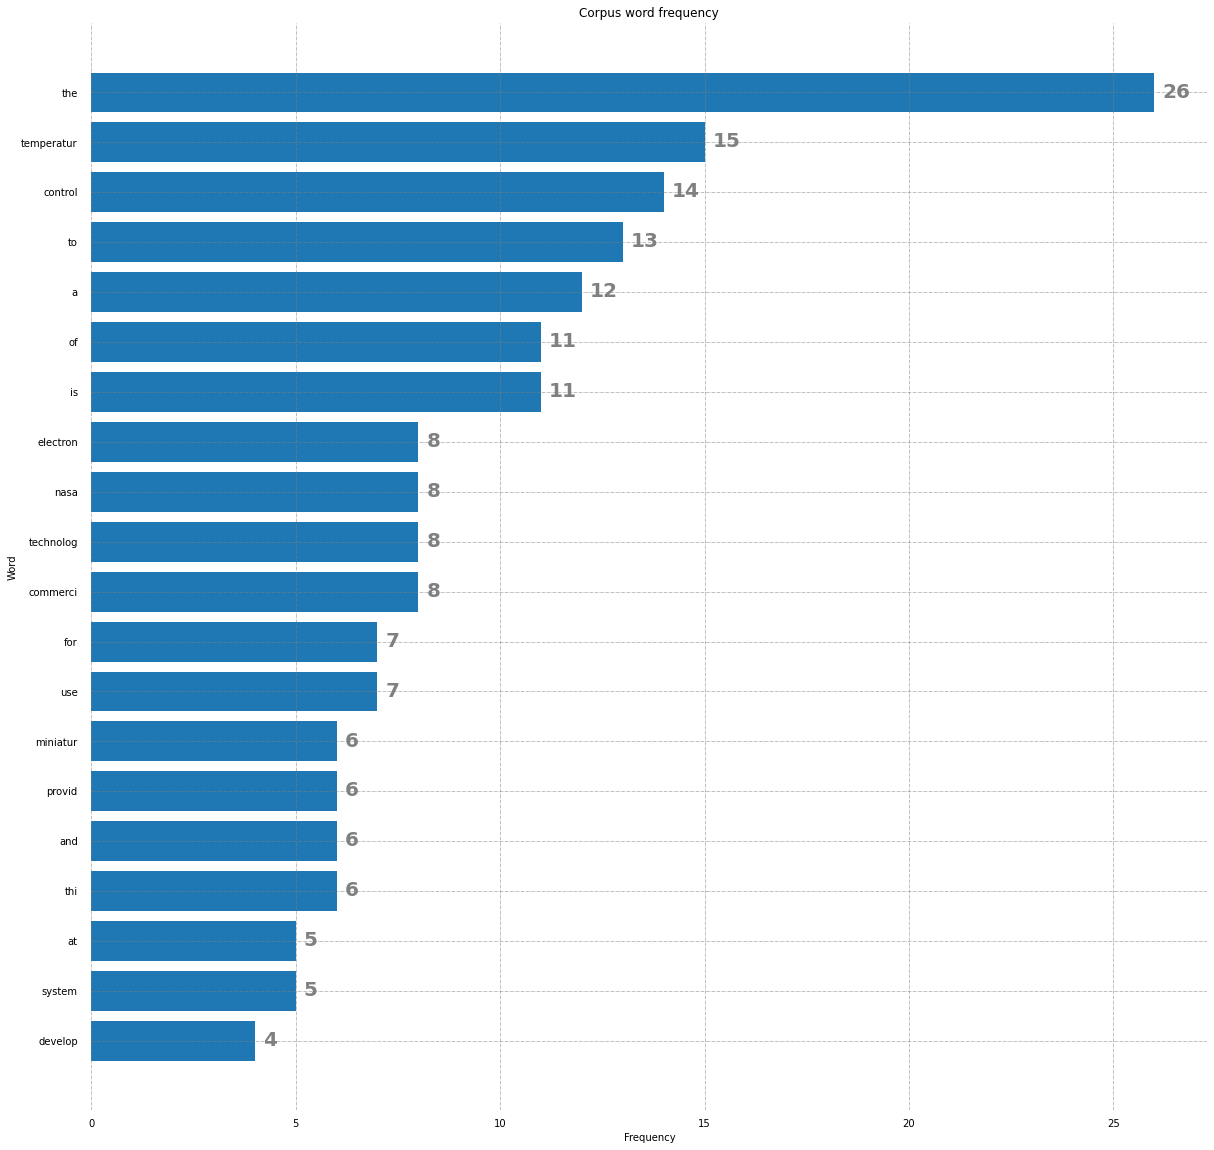

In [7]:
# Term frequency distribution plot in first document
N = 20
stemmed_dict, stemmed_text = stemmer([tokenized_text[0]])
top_stems = get_top_stems(stemmed_dict, N)
plot_tf_dist(top_stems)

## Task 3

In [8]:
def get_terms_per_doc(tokenized_text: list):
    terms_per_doc = [set(doc) for doc in tokenized_text]
    return terms_per_doc

def get_terms(tokenized_text: list):
    terms = set()
    for doc in tokenized_text:
        for token in doc:
            terms.add(token)
    return list(terms)

# Term Frequency
def get_tf_dict(tokenized_text: list, text_file_names: list, stemming=False):
    tf = {}
    if stemming:
        ps = PorterStemmer()
        for i, doc in enumerate(tokenized_text):
            freq_dict = {}
            for token in doc:
                root = ps.stem(token)
                if root in freq_dict:
                    freq_dict[root] += 1
                else:
                    freq_dict[root] = 1
            file = text_file_names[i]
            tf[file] = freq_dict
    else:
        for i, doc in enumerate(tokenized_text):
            freq_dict = {}
            for token in doc:
                if token in freq_dict:
                    freq_dict[token] += 1
                else:
                    freq_dict[token] = 1
            file = text_file_names[i]
            tf[file] = freq_dict
    return tf

def get_tf_matrix(tf_dict: dict):    
    tf_matrix = pd.DataFrame.from_dict(tf_dict)
    tf_matrix = tf_matrix.fillna(0)
    tf_matrix = tf_matrix / tf_matrix.max()
    return tf_matrix

# Inverse Document Frequency
def get_idf_dict(tokenized_text: list, text_file_names: list, stemming=False):
    if stemming:
        _, tokenized_text = stemmer(tokenized_text)
    terms_per_doc = get_terms_per_doc(tokenized_text)
    terms = get_terms(tokenized_text)
    idf = {}
    N = len(text_file_names)
    for term in terms:
        count = 0
        for doc in terms_per_doc:
            if term in doc:
                count += 1
        idf[term] = np.log(N / count)
    return idf

# Term Frequency - Inverse Document Frequency
def get_tf_idf_matrix(tf_matrix: pd.DataFrame, idf_dict: dict):
    tfidf_matrix = tf_matrix.copy()
    for term in tfidf_matrix.index:
        tfidf_matrix.loc[term] = tfidf_matrix.loc[term] * idf_dict[term]
    return tfidf_matrix

# Stopwords
def get_stopwords(path: str):
    with open(path, 'r') as f:
        stopwords = f.read().splitlines()
    return stopwords

def remove_stopwords(path: str, tokenized_text: list):
    stopwords = get_stopwords(path)
    tokenized_text = [[token for token in doc if token not in stopwords] for doc in tokenized_text]
    return tokenized_text

In [9]:
# Compute term frequency matrix and tf-idf matrix for all documents without removing stopwords
directory = "./nasa"
text_files = get_text_files(directory, shuffle=False)
text_file_names = [text_file.split('/')[-1] for text_file in text_files]
text = get_text(text_files)
tokenized_text = tokenization(text)

In [10]:
tf_dict = get_tf_dict(tokenized_text, text_file_names, stemming=True)
tf_matrix = get_tf_matrix(tf_dict)
print(tf_matrix)

            ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
miniatur        0.230769      0.000000      0.000000        0.0000   
electron        0.307692      0.000000      0.000000        0.0000   
temperatur      0.576923      0.000000      0.045455        0.0000   
control         0.538462      0.466667      0.000000        0.0000   
a               0.461538      0.533333      1.000000        0.4375   
...                  ...           ...           ...           ...   
reignit         0.000000      0.000000      0.000000        0.0000   
petroleum       0.000000      0.000000      0.000000        0.0000   
restart         0.000000      0.000000      0.000000        0.0000   
render          0.000000      0.000000      0.000000        0.0000   
preced          0.000000      0.000000      0.000000        0.0000   

            sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
miniatur        0.000000      0.000000      0.000000      0.000000   
electron        0.0

In [11]:
idf_dict = get_idf_dict(tokenized_text, text_file_names, stemming=True)
tfidf_matrix = get_tf_idf_matrix(tf_matrix, idf_dict)
print(tfidf_matrix)

            ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
miniatur        0.692965      0.000000      0.000000       0.00000   
electron        0.387656      0.000000      0.000000       0.00000   
temperatur      0.712608      0.000000      0.056145       0.00000   
control         0.526867      0.456618      0.000000       0.00000   
a               0.006594      0.007619      0.014286       0.00625   
...                  ...           ...           ...           ...   
reignit         0.000000      0.000000      0.000000       0.00000   
petroleum       0.000000      0.000000      0.000000       0.00000   
restart         0.000000      0.000000      0.000000       0.00000   
render          0.000000      0.000000      0.000000       0.00000   
preced          0.000000      0.000000      0.000000       0.00000   

            sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
miniatur        0.000000      0.000000      0.000000      0.000000   
electron        0.0

In [12]:
# Compute term frequency matrix and tf-idf matrix for all documents after removing stopwords
stop_words_path = "./english.stop"
text_files = get_text_files(directory, shuffle=False)
text = get_text(text_files)
tokenized_text = tokenization(text)
tokenized_text = remove_stopwords(stop_words_path, tokenized_text)

In [13]:
# Term frequency matrix with stemming
tf_dict_stop = get_tf_dict(tokenized_text, text_file_names, stemming=True)
tf_matrix_stop = get_tf_matrix(tf_dict_stop)
print(tf_matrix_stop)

            ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
miniatur        0.400000      0.000000      0.000000          0.00   
electron        0.533333      0.000000      0.000000          0.00   
temperatur      1.000000      0.000000      0.071429          0.00   
control         0.933333      0.583333      0.000000          0.00   
develop         0.266667      0.333333      0.357143          0.25   
...                  ...           ...           ...           ...   
reignit         0.000000      0.000000      0.000000          0.00   
petroleum       0.000000      0.000000      0.000000          0.00   
restart         0.000000      0.000000      0.000000          0.00   
render          0.000000      0.000000      0.000000          0.00   
preced          0.000000      0.000000      0.000000          0.00   

            sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
miniatur        0.000000      0.000000         0.000           0.0   
electron        0.1

In [14]:
# tf-idf matrix with stemming
idf_dict_stop = get_idf_dict(tokenized_text, text_file_names, stemming=True)
tfidf_matrix_stop = get_tf_idf_matrix(tf_matrix_stop, idf_dict_stop)
print(tfidf_matrix_stop)

            ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
miniatur        1.201140      0.000000      0.000000           0.0   
electron        0.671936      0.000000      0.000000           0.0   
temperatur      1.235188      0.000000      0.088228           0.0   
control         0.913237      0.570773      0.000000           0.0   
develop         0.000000      0.000000      0.000000           0.0   
...                  ...           ...           ...           ...   
reignit         0.000000      0.000000      0.000000           0.0   
petroleum       0.000000      0.000000      0.000000           0.0   
restart         0.000000      0.000000      0.000000           0.0   
render          0.000000      0.000000      0.000000           0.0   
preced          0.000000      0.000000      0.000000           0.0   

            sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
miniatur        0.000000           0.0           0.0      0.000000   
electron        0.1

## Task 4

In [15]:
# Stem Analysis
def get_top_stems_per_doc(df: pd.DataFrame, n: int):
    docs = df.columns.values.tolist()
    terms = df.index.values.tolist()
    top_stems = []
    for i in range(len(docs)):
        doc_values = zip(terms, df.iloc[:, i])
        doc_values = sorted(doc_values, key = lambda x : x[1], reverse=True)[:n]
        series = pd.Series([x[1] for x in doc_values], index=[x[0] for x in doc_values])
        top_stems.append(series)
        
    top_stems_by_doc = pd.DataFrame(top_stems)
    top_stems_by_doc = top_stems_by_doc.T
    top_stems_by_doc = top_stems_by_doc.fillna(0)
    top_stems_by_doc.columns = docs
    return top_stems, top_stems_by_doc

# Boolean and vector models based on top p stems
def complete_vocabulary(df: pd.DataFrame, top_stems_by_doc: pd.DataFrame):
    top_stems_doc = top_stems_by_doc.copy()
    vocab = df.index.values.tolist()
    current_vocab = set(top_stems_doc.index.values.tolist())
    for term in vocab:
        if term not in current_vocab:
            top_stems_doc.loc[term] = 0.0
    return top_stems_doc

def boolean_model(df: pd.DataFrame, top_stems_by_doc: pd.DataFrame):
    top_stems_doc = complete_vocabulary(df, top_stems_by_doc)
    docs = top_stems_doc.columns.values.tolist()
    terms = top_stems_doc.index.values.tolist()
    boolean_matrix = pd.DataFrame(0, index=terms, columns=docs)
    for doc in docs:
        for term in terms:
            if top_stems_doc.loc[term, doc] > 0:
                boolean_matrix.loc[term, doc] = 1
    return boolean_matrix

def vector_model(df: pd.DataFrame, top_stems_by_doc: pd.DataFrame):
    vector_matrix = complete_vocabulary(df, top_stems_by_doc)
    return vector_matrix

In [16]:
# Top p stems for each document using tf-idf matrix
p = 20
tfidf_top_stems, tfidf_top_stems_by_doc = get_top_stems_per_doc(tfidf_matrix, p)

# tf-idf system based on top stems
tfidf_vector_matrix = vector_model(tfidf_matrix, tfidf_top_stems_by_doc)

### Probabilistic Model

In [17]:
# Query functions for probabilistic model
def get_query(directory: str, N=1, stemming=False):
    text_files = get_text_files(directory, N=N, shuffle=True)
    text = get_text(text_files)
    text_files = [Path(file).stem + '.txt' for file in text_files]
    query = ""
    for t in text:
        start = random.randint(0, len(t) // 2)
        end = random.randint(start, len(t))
        query += t[start:end]
    query = tokenization(query)
    if stemming:
        _, query = stemmer([query])
        query = query[0]
    return query, text_files

def get_query_vector(query: list, df: pd.DataFrame):
    query_vector = pd.Series(0, index=df.index.values.tolist())
    for term in query:
        if term in query_vector.index:
            query_vector.loc[term] += 1
    query_vector = query_vector / query_vector.max()
    return query_vector

def queryVectorRepresentation(query: list, idf_dict: dict):
    query_dict = {}
    for term in query:
        if term not in query_dict:
            query_dict[term] = 1
        else:
            query_dict[term] += 1
    
    max_freq = max(query_dict.values())
    for term in query_dict:
        query_dict[term] = query_dict[term] / max_freq
            
    query_vector = {}
    for term in idf_dict:
        if term in query_dict:
            query_vector[term] = query_dict[term] * idf_dict[term]
        else:
            query_vector[term] = 0
    return pd.Series(query_vector)

def get_query_prob(text_files: list, stemming=False):
    text = get_text(text_files)
    text_files = [Path(file).stem + '.txt' for file in text_files]
    query = ""
    for t in text:
        start = random.randint(0, len(t) // 2)
        end = random.randint(start, len(t))
        query += t[start:end]
    query = tokenization(query)
    if stemming:
        _, query = stemmer([query])
        query = query[0]
    return query

In [18]:
class ProbabilisticInformationRetrievalModel:
    def __init__(self, documents, index_terms, df=None):
        self.documents = documents
        self.index_terms = index_terms
        self.num_documents = len(documents)
        self.num_index_terms = len(index_terms)
        self.P_R = None  # Probability that a document is relevant
        self.P_not_R = None  # Probability that a document is non-relevant
        self.weights = None  # Index term weights
        self.df = df

    # Initialize P(t_i|R) to 0.5 and P(t_i|¬R) based on term distribution
    def initialize_probabilities(self):
        self.P_R = np.full(self.num_index_terms, 0.5)
        term_counts = np.zeros(self.num_index_terms)

        for doc in self.documents:
            for i, term in enumerate(self.index_terms):
                if term in doc:
                    term_counts[i] += 1

        self.P_not_R = term_counts / self.num_documents

    # Calculate index term weights based on the probabilistic model
    def calculate_weights(self):
        self.weights = np.zeros(self.num_documents)
        for j, doc in enumerate(self.documents):
            for i, term in enumerate(self.index_terms):
                if not self.df.empty:
                    col = self.df.iloc[:, j]
                    if term in col.index:
                        tfidf = col[term] * self.index_terms.count(term)
                    else:
                        tfidf = 0
                    weight = (
                        np.log((self.P_R[i] / (1 - self.P_R[i])) + 1e-10)
                        + np.log(((1 - self.P_not_R[i]) / self.P_not_R[i]) + 1e-10)
                    )
                    self.weights[j] += tfidf * weight
                else:
                    tf = doc.count(term)
                    weight = (
                        np.log((self.P_R[i] / (1 - self.P_R[i])) + 1e-10)
                        + np.log(((1 - self.P_not_R[i]) / self.P_not_R[i]) + 1e-10)
                    )
                    self.weights[j] += tf * weight

    # Rank documents based on the calculated weights
    def rank_documents(self):
        ranked_docs = list(enumerate(self.weights))
        ranked_docs.sort(key=lambda x: x[1], reverse=True)
        return ranked_docs

    # Update P(t_i|R) and P(t_i|¬R) based on the top-ranked documents
    def update_probabilities(self, top_ranked_documents):
        term_counts_in_R = np.zeros(self.num_index_terms)
        term_counts_not_in_R = np.zeros(self.num_index_terms)

        for doc_idx, _ in top_ranked_documents:
            doc = self.documents[doc_idx]
            for i, term in enumerate(self.index_terms):
                if term in doc:
                    term_counts_in_R[i] += 1
                else:
                    term_counts_not_in_R[i] += 1

        self.P_R = (term_counts_in_R + 0.5) / (len(top_ranked_documents) + 1)
        self.P_not_R = (term_counts_not_in_R + 0.5) / (self.num_documents - len(top_ranked_documents) + 1)

In [19]:
query, relevant_docs = get_query(directory, N=1, stemming=True)
query_vector = queryVectorRepresentation(query, idf_dict)

In [20]:
directory = "./nasa"
text_files = get_text_files(directory, shuffle=False)
text = get_text(text_files)
tokenized_text = tokenization(text)
_, tokenized_text = stemmer(tokenized_text)
text_files = [text_file.split('/')[-1] for text_file in text_files]

documents = [' '.join(doc) for doc in tokenized_text]
# documents = tokenized_text

model = ProbabilisticInformationRetrievalModel(documents, query, tfidf_vector_matrix)
model.initialize_probabilities()

# Initial ranking
model.calculate_weights()
initial_ranking = model.rank_documents()
print("Initial Ranking:")
for rank, (doc_idx, score) in enumerate(initial_ranking, start=1):
    print(f"Rank {rank}: Document {doc_idx} - Score: {score:.2f}")

# Update probabilities and re-rank
top_r = 10  # Choose a threshold for top-ranked documents
top_ranked_docs = initial_ranking[:top_r]
model.update_probabilities(top_ranked_docs)

# Re-rank documents after the update
model.calculate_weights()
updated_ranking = model.rank_documents()
print("\nUpdated Ranking:")
for rank, (doc_idx, score) in enumerate(updated_ranking, start=1):
    print(f"Rank {rank}: Document {doc_idx} - Score: {score:.2f}")

Initial Ranking:
Rank 1: Document 135 - Score: 5.86
Rank 2: Document 71 - Score: 5.37
Rank 3: Document 12 - Score: 4.77
Rank 4: Document 124 - Score: 1.16
Rank 5: Document 50 - Score: 1.08
Rank 6: Document 1 - Score: 1.07
Rank 7: Document 0 - Score: 1.01
Rank 8: Document 47 - Score: 0.96
Rank 9: Document 64 - Score: 0.83
Rank 10: Document 129 - Score: 0.57
Rank 11: Document 19 - Score: 0.49
Rank 12: Document 79 - Score: 0.47
Rank 13: Document 37 - Score: 0.34
Rank 14: Document 30 - Score: 0.25
Rank 15: Document 125 - Score: 0.24
Rank 16: Document 104 - Score: 0.17
Rank 17: Document 29 - Score: 0.15
Rank 18: Document 13 - Score: 0.13
Rank 19: Document 56 - Score: 0.11
Rank 20: Document 53 - Score: 0.11
Rank 21: Document 83 - Score: 0.11
Rank 22: Document 84 - Score: 0.09
Rank 23: Document 25 - Score: 0.07
Rank 24: Document 2 - Score: 0.00
Rank 25: Document 3 - Score: 0.00
Rank 26: Document 4 - Score: 0.00
Rank 27: Document 5 - Score: 0.00
Rank 28: Document 6 - Score: 0.00
Rank 29: Docum

In [21]:
print(f"Weights:\n{model.weights}")
print(f"\nP_R:\n{model.P_R}")
print(f"\nP_not_R:\n{model.P_not_R}")
print(f"\n{model.num_documents} Documents:\n{model.documents}")
print(f"\n{model.num_index_terms} Index Terms:\n{model.index_terms}")

Weights:
[13.30178853 13.03806461  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 19.37428095  1.02016749  0.          0.          0.          0.
  0.          3.77461971  0.          0.          0.          0.
  0.          0.51008374  0.          0.          0.          1.1487973
  1.96936681  0.          0.          0.          0.          0.
  0.          2.62582241  0.          0.          0.          0.
  0.          0.          0.          0.          0.         12.66837003
  0.          0.         14.30192301  0.          0.          0.85233348
  0.          0.          0.8807446   0.          0.          0.
  0.          0.          0.          0.          9.85213468  0.
  0.          0.          0.          0.          0.          5.34623273
  0.          0.          0.          0.          0.          0.
  0.          6.17583039  0.          0.          0.          0.85233348
  0.73395383  0.          0.          0.  

In [22]:
rel_docs = {}
for i, doc in enumerate(text_files):
    if doc in relevant_docs:
        rel_docs[doc] = f"Document {i}"
res = json.dumps(rel_docs, indent=4)
print(f"Relevant documents:\n{res}\n")

Relevant documents:
{
    "sbr21395.txt": "Document 12"
}



### LSI Model

In [23]:
def LSI_model(df: pd.DataFrame, num_eigen=0):
    text_files = df.columns.values.tolist()
    tdm = df.to_numpy()
    if num_eigen == 0:
        num_eigen = min(tdm.shape)
    U, s, Vh = np.linalg.svd(tdm)
    U, s, Vh = U[:, :num_eigen], s[:num_eigen], Vh[:num_eigen, :]
    S = np.diag(s)
    M = U @ S @ Vh
    model = M.T @ M
    model = pd.DataFrame(model, index=text_files, columns=text_files)
    return model

# Query function for LSI model
def get_query_lsi(directory: str, N=1):
    text_files = get_text_files(directory, N=N, shuffle=True)
    query = [Path(file).stem + '.txt' for file in text_files]
    return query

# Retrieval
def retrieval_lsi(query: list, model: pd.DataFrame):
    docs = model.index.values.tolist()
    ranked = pd.Series(0, index = docs)
    for doc in docs:
        total = 0
        for rel in query:
            total += model[rel][doc]
        total /= len(query)
        ranked[doc] = total
    return ranked.sort_values(ascending=False)

# Run model
def test_model_lsi(query: list, model: pd.DataFrame, display=False):
    ranked_docs = retrieval_lsi(query, model)
    if display:
        display_result_lsi(query, ranked_docs)
    result = {}
    i = 1
    for doc in ranked_docs.index.values.tolist():
        result[doc] = i
        i += 1
    return result, ranked_docs

def display_result_lsi(query: list, ranked_docs: pd.Series):
    print(f"Query\n{query}\n")
    # print(f"Ranked List\n{ranked_docs}\n")
    query_pos = {}
    i = 1
    for doc in ranked_docs.index.values.tolist():
        if doc in query:
            query_pos[doc] = i
        print(f"Document {doc} with score {ranked_docs[doc]} is at rank {i}")
        i += 1
    print()
    for doc in query:
        if doc in query_pos:
            print(f"Query document {doc} is at rank {query_pos[doc]}")

def visualize_rankings(data: dict, ranked_docs_dict: dict, type=None):
    # Create a separate heatmap for each query
    for query, query_data in data.items():
        df = ranked_docs_dict[query].to_frame()

        # Create a heatmap for the current query with dynamic figure size
        num_documents = len(df)
        fig_height = max(4, num_documents * 0.4)  # Minimum height of 4 inches
        plt.figure(figsize=(8, fig_height))
        sns.heatmap(df, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, cbar=False)

        # Customize the y-labels with highlighting
        for i, label in enumerate(plt.gca().get_yticklabels()):
            if label.get_text() in query_data["query"]:
                label.set_weight('bold')
                label.set_color('red')
            else:
                label.set_weight('normal')
                label.set_color('black')

        if type:
            plt.title(f"{type} Model Document Rankings for {query}")
        else:
            plt.title(f"Model Document Rankings for {query}")
        plt.xlabel("Document")
        plt.ylabel("Ranking")
        plt.show()

In [24]:
lsi_model = LSI_model(tfidf_vector_matrix, num_eigen=20)
lsi_model.head()

ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
ins15795.txt      0.111080      0.345648      0.029972      0.007731   
emt15895.txt      0.345648     17.685960      0.975579     -0.048832   
ins20495.txt      0.029972      0.975579      0.353058      0.028089   
inf12795.txt      0.007731     -0.048832      0.028089     19.192226   
sbr17695.txt      0.017975      0.684739      0.065885     -0.007965   

              sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
ins15795.txt      0.017975      0.014827      0.002547      0.018262   
emt15895.txt      0.684739      0.070477      0.018706      0.764945   
ins20495.txt      0.065885      0.013180      0.023010      0.057527   
inf12795.txt     -0.007965      0.004790      0.001948      0.010670   
sbr17695.txt      0.133085      0.006250      0.030855      0.099341   

              sbr16395.txt  mip14895.txt  ...  eos06895.txt  mip09195.txt  \
ins15795.txt      0.206230      0.054949  ...      0.061506      0.108380   
emt15895.txt      0.117351      0.081019  ...      0.066694      2.641361   
ins20495.txt     -0.038613      0.014749  ...      0.123132      0.157099   
inf12795.txt      0.017823      0.041318  ...     -0.019703     -0.006914   
sbr17695.txt      0.007099      0.027466  ...      0.216665      0.095482   

              emt04895.txt  eos03995.txt  sbr17895.txt  emt07295.txt  \
ins15795.txt      0.004374      0.025568      0.078816      0.005001   
emt15895.txt      0.040367      0.029975      0.607513      0.149782   
ins20495.txt      0.127914      0.020634      0.044549      0.026955   
inf12795.txt      0.099668      0.007698      0.025000      0.002670   
sbr17695.txt      0.188342      0.027908      0.025574      0.028564   

              emt05095.txt  ins14595.txt  emt11895.txt  ins16295.txt  
ins15795.txt      0.004565      0.013990      0.021054      0.021704  
emt15895.txt     -0.062941      0.036938      0.081049      0.034698  
ins20495.txt     -0.060754      0.011459      0.162152      0.030863  
inf12795.txt     -0.061558     -0.032823     -0.013619     -0.001316  
sbr17695.txt      0.142958      0.005150      0.271208      0.006524  

[5 rows x 141 columns]

### Rankings

In [25]:
# Ranked results of LSI model using s queries
s = 3
directory = "./nasa"
results_lsi = {}
ranked_docs_dict_lsi = {}
for i in range(s):
    key = "query" + str(i + 1)
    query = get_query_lsi(directory, 1)
    results_lsi[key] = {"query": query}
    results_lsi[key]["lsi_model"], ranked_docs = test_model_lsi(query, lsi_model)
    ranked_docs_dict_lsi[key] = ranked_docs
results_string_lsi = json.dumps(results_lsi, indent=4)
print(results_string_lsi)

{
    "query1": {
        "query": [
            "emt04495.txt"
        ],
        "lsi_model": {
            "str05695.txt": 1,
            "emt04495.txt": 2,
            "eos05595.txt": 3,
            "ins20495.txt": 4,
            "emt15895.txt": 5,
            "str10895.txt": 6,
            "mip19395.txt": 7,
            "str02595.txt": 8,
            "eos21295.txt": 9,
            "mat09995.txt": 10,
            "inf12995.txt": 11,
            "mip09195.txt": 12,
            "sbr17895.txt": 13,
            "str00795.txt": 14,
            "eos19895.txt": 15,
            "mip15495.txt": 16,
            "eos19995.txt": 17,
            "eos03595.txt": 18,
            "ins16295.txt": 19,
            "inf18695.txt": 20,
            "ins20595.txt": 21,
            "ins03495.txt": 22,
            "sbr21395.txt": 23,
            "ins18795.txt": 24,
            "emt04895.txt": 25,
            "ins15795.txt": 26,
            "emt13895.txt": 27,
            "emt17495.txt": 28,
            "eo

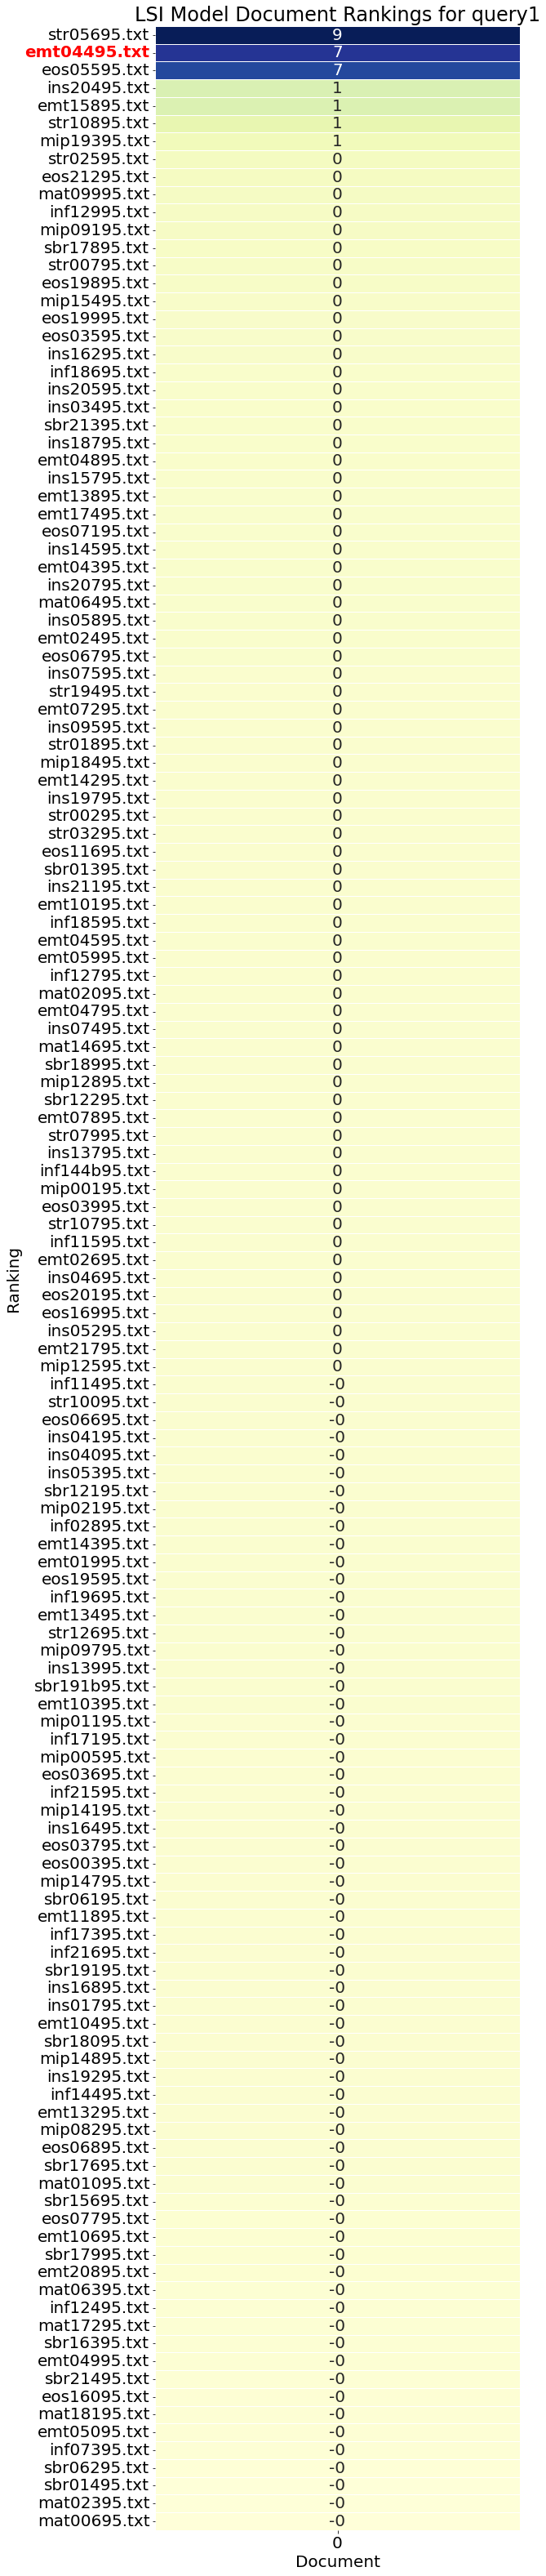

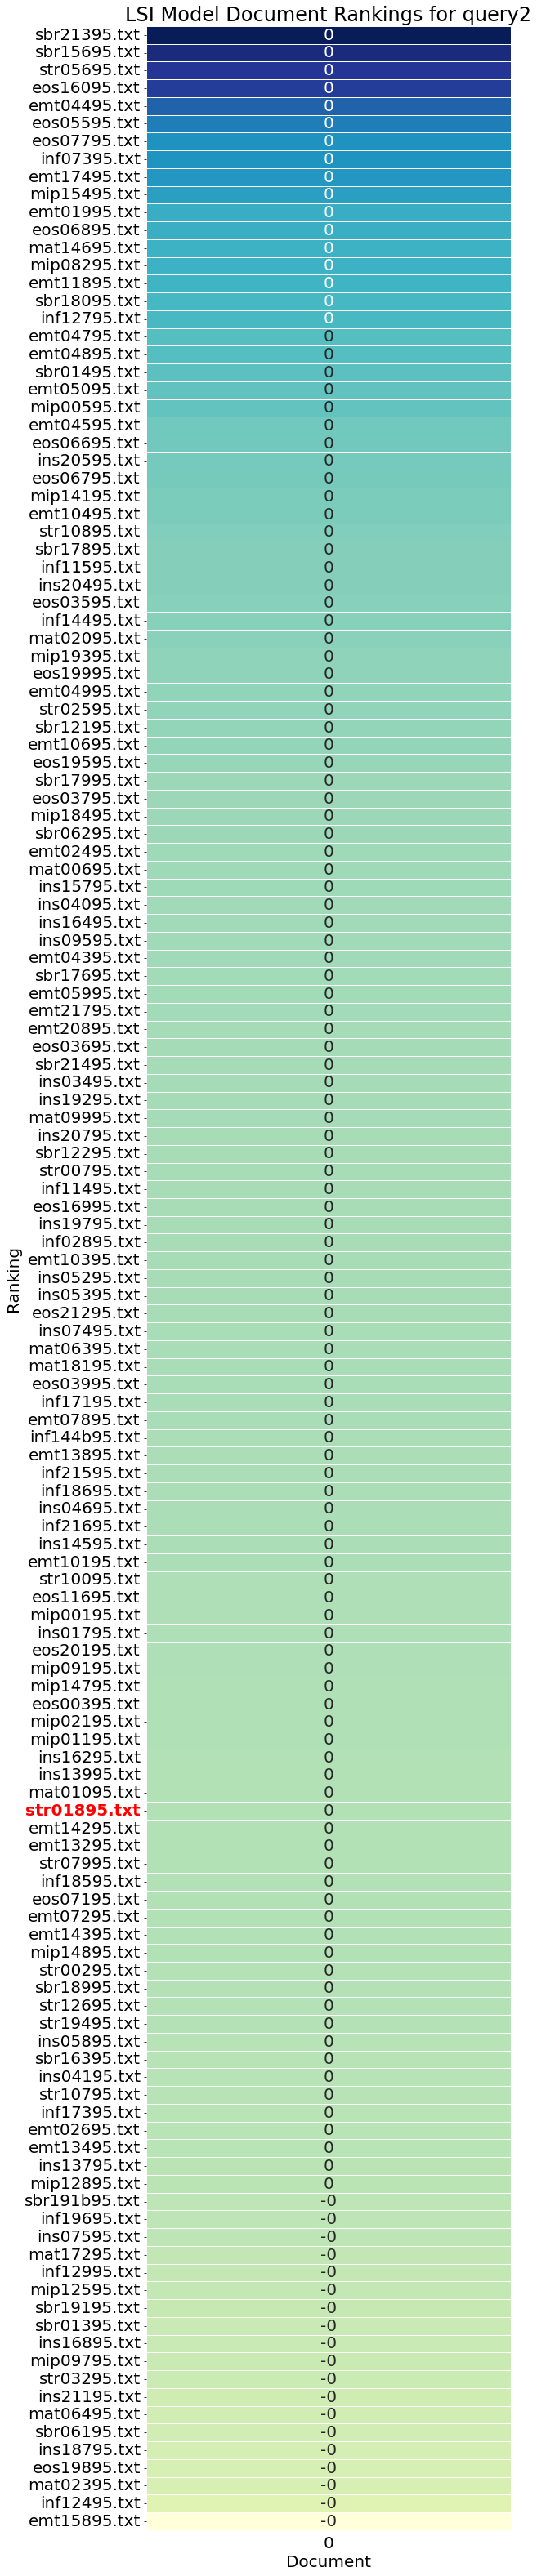

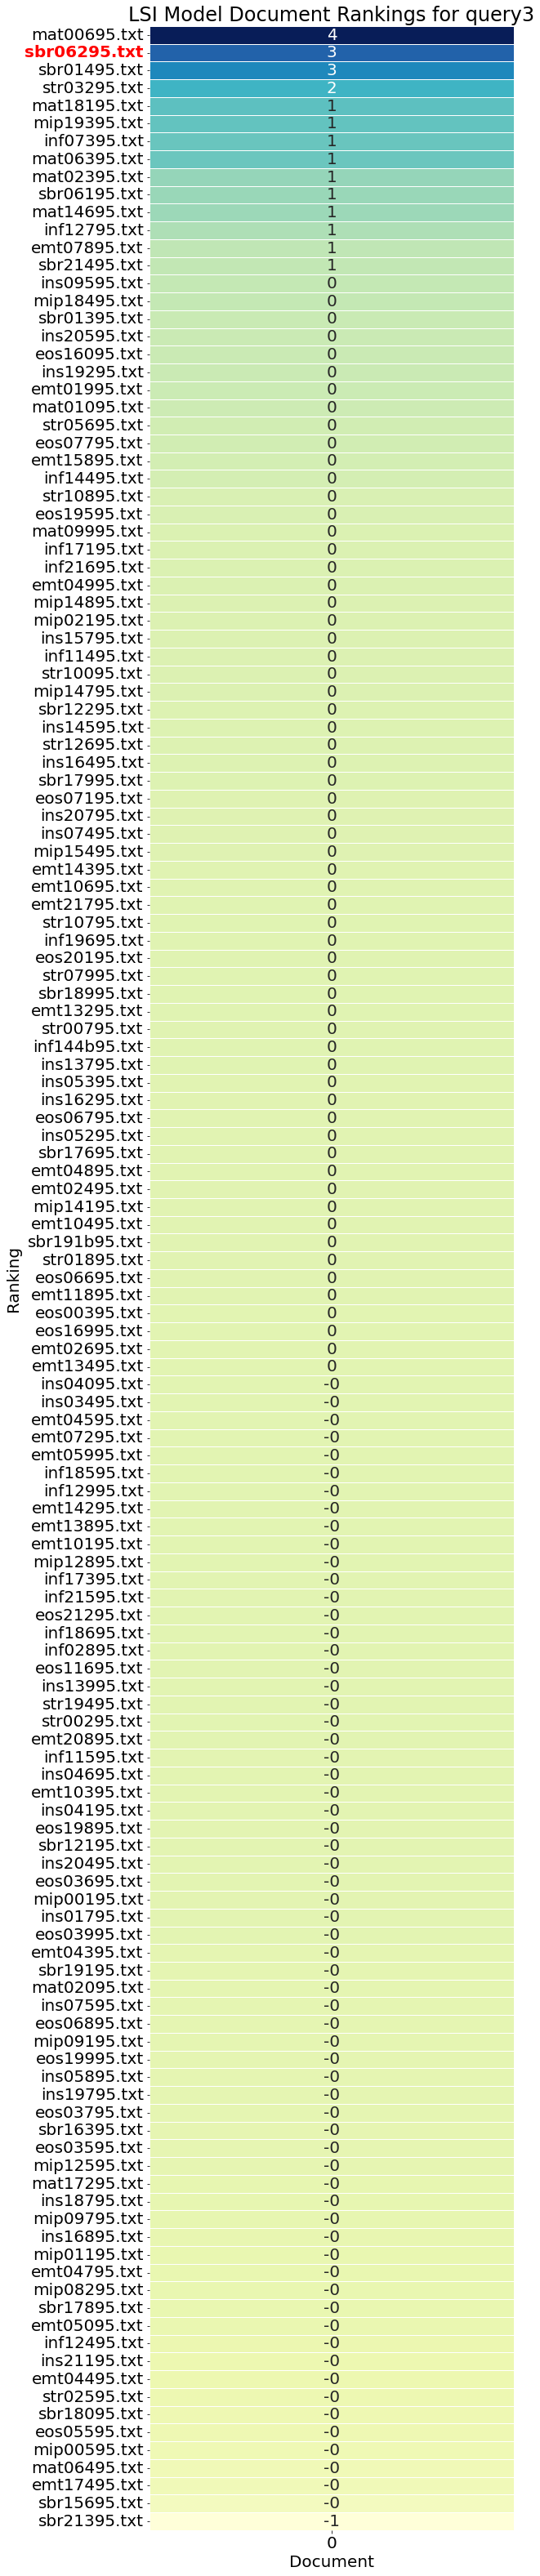

In [26]:
visualize_rankings(results_lsi, ranked_docs_dict_lsi, type="LSI")

In [27]:
def test_model_prob(documents, query, tfidf_matrix, doc_names):
    model = ProbabilisticInformationRetrievalModel(documents, query, tfidf_matrix)
    model.initialize_probabilities()

    # Initial ranking
    model.calculate_weights()
    initial_ranking = model.rank_documents()

    # Update probabilities and re-rank
    top_r = 10  # Choose a threshold for top-ranked documents
    top_ranked_docs = initial_ranking[:top_r]
    model.update_probabilities(top_ranked_docs)

    # Re-rank documents after the update
    model.calculate_weights()
    updated_ranking = model.rank_documents()
    
    result = {}
    for rank, (doc_idx, score) in enumerate(updated_ranking, start=1):
        result[doc_names[doc_idx]] = rank
    ranked_docs = pd.Series(result)
    return result, ranked_docs

In [28]:
# Get relevant documents and tokenized content of all documents
directory = "./nasa"
rel_text_files = [results_lsi[key]["query"] for key in results_lsi]
for i, file_list in enumerate(rel_text_files):
    rel_text_files[i] = [directory + '/' + file for file in file_list]

text_files = get_text_files(directory, shuffle=False)
text = get_text(text_files)
tokenized_text = tokenization(text)
_, tokenized_text = stemmer(tokenized_text)

text_files = [text_file.split('/')[-1] for text_file in text_files]
documents = [' '.join(doc) for doc in tokenized_text]

In [29]:
# Ranked results of Probabilistic model using s queries
s = 3
directory = "./nasa"
results_prob = {}
ranked_docs_dict_prob = {}
for i in range(s):
    key = "query" + str(i + 1)
    query = get_query_prob(rel_text_files[i], stemming=True)
    results_prob[key] = {"query": [file.split('/')[-1] for file in rel_text_files[i]]}
    results_prob[key]["prob_model"], ranked_docs = test_model_prob(documents, query, tfidf_matrix, text_files)
    ranked_docs_dict_prob[key] = ranked_docs
results_string_prob = json.dumps(results_prob, indent=4)
print(results_string_prob)

{
    "query1": {
        "query": [
            "emt04495.txt"
        ],
        "prob_model": {
            "emt04495.txt": 1,
            "eos05595.txt": 2,
            "str05695.txt": 3,
            "emt11895.txt": 4,
            "emt04595.txt": 5,
            "sbr17695.txt": 6,
            "ins20495.txt": 7,
            "emt13895.txt": 8,
            "emt15895.txt": 9,
            "inf12995.txt": 10,
            "emt05095.txt": 11,
            "emt04995.txt": 12,
            "emt14395.txt": 13,
            "inf19695.txt": 14,
            "emt13495.txt": 15,
            "eos19995.txt": 16,
            "emt07295.txt": 17,
            "sbr17895.txt": 18,
            "emt10695.txt": 19,
            "emt10495.txt": 20,
            "str03295.txt": 21,
            "emt10195.txt": 22,
            "emt01995.txt": 23,
            "emt10395.txt": 24,
            "emt02495.txt": 25,
            "mip15495.txt": 26,
            "inf21695.txt": 27,
            "str02595.txt": 28,
            "s

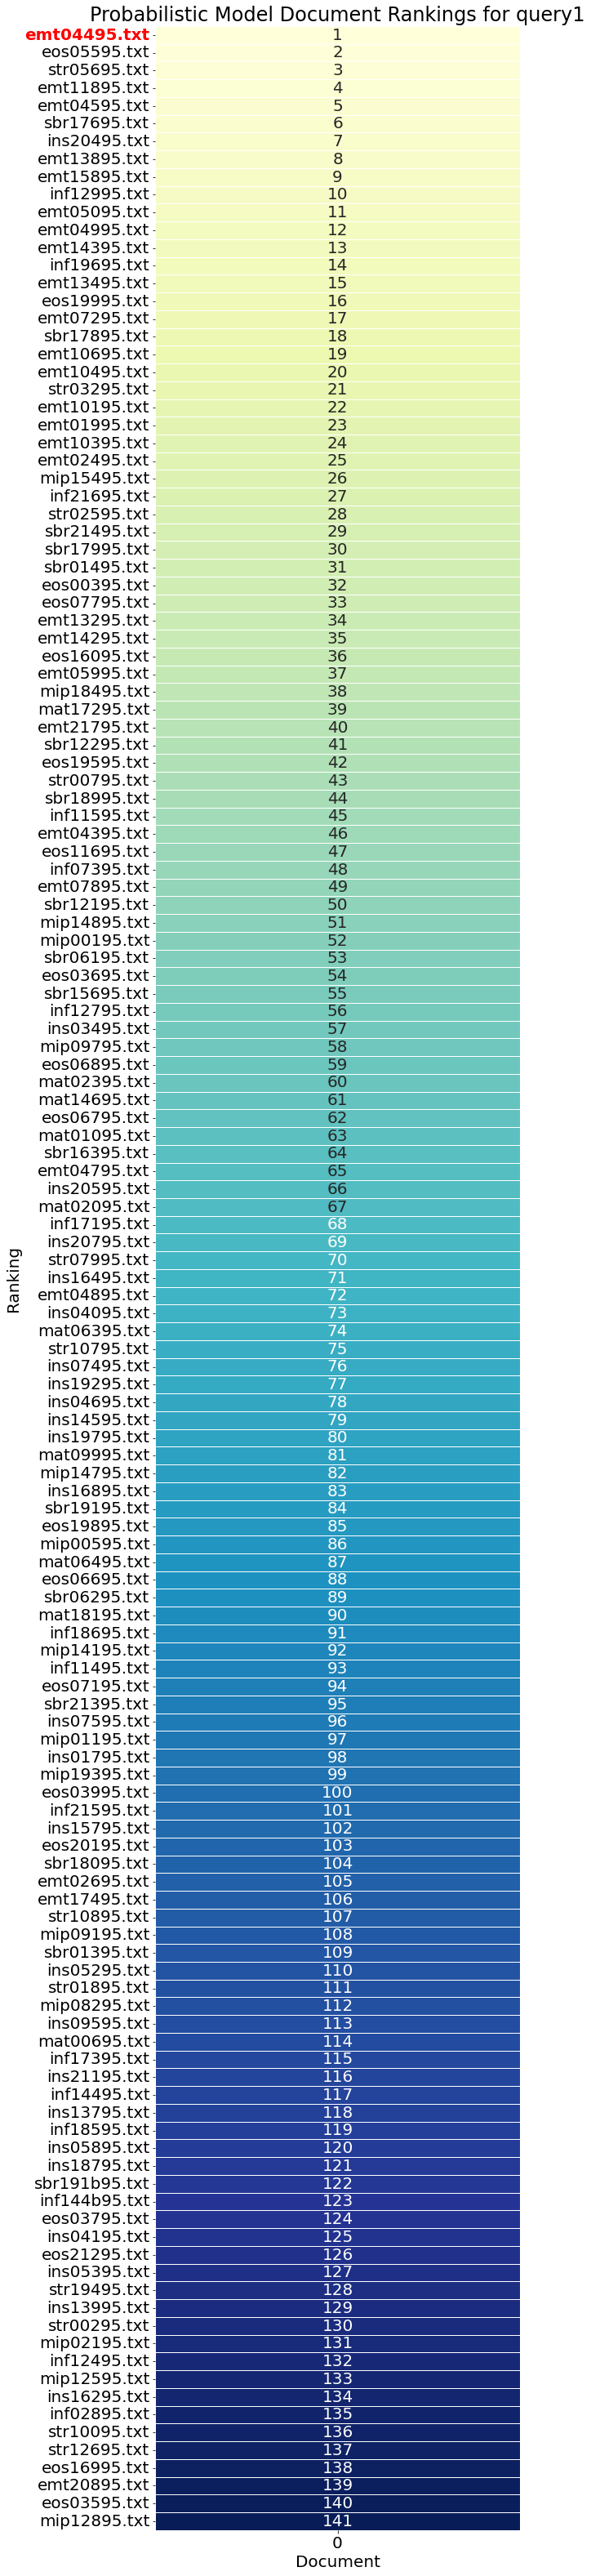

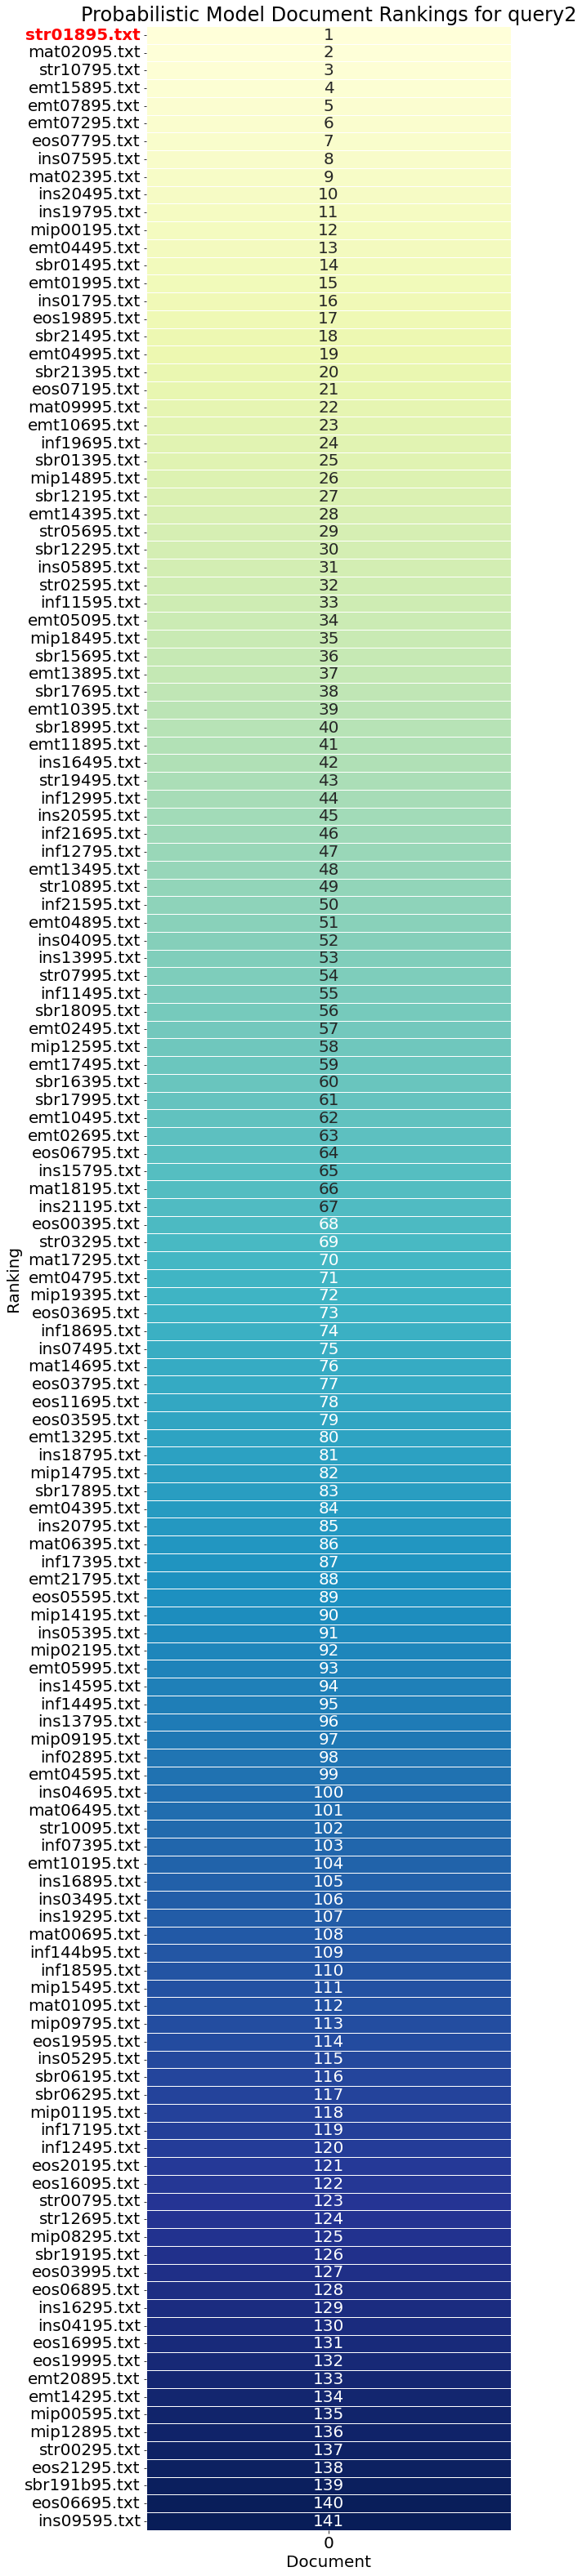

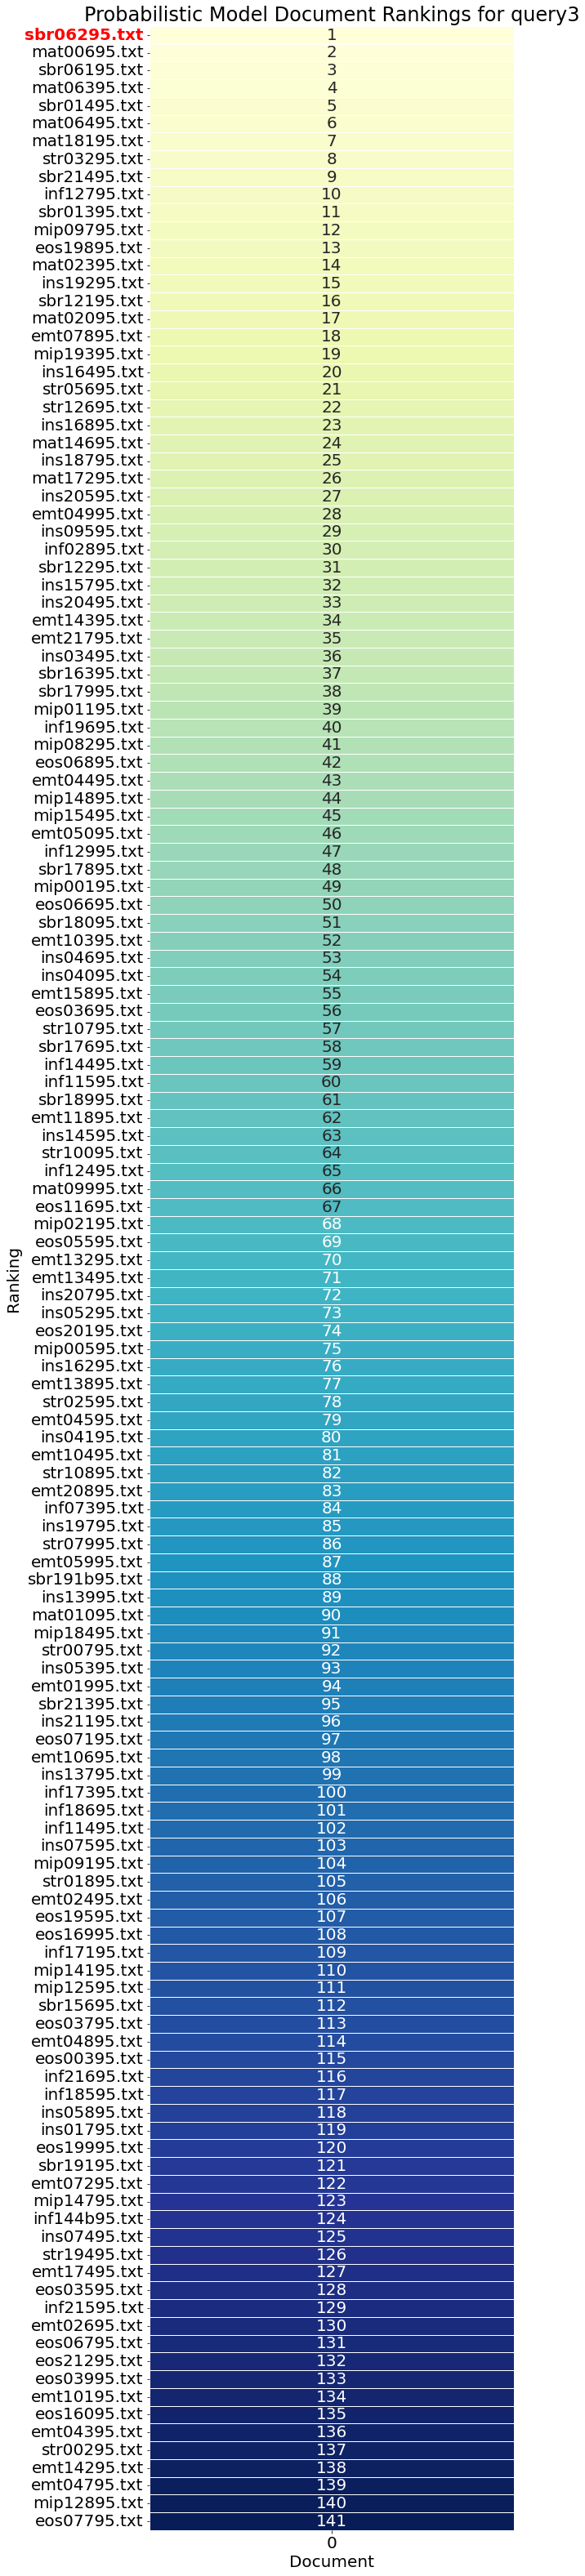

In [30]:
visualize_rankings(results_prob, ranked_docs_dict_prob, type="Probabilistic")

### Comparison Between LSI and Probabilistic Models

In [31]:
model_comparison = {}
for key in results_lsi:
    model_comparison[key] = {"query": results_lsi[key]["query"]}
    for file in model_comparison[key]["query"]:
        model_comparison[key][file] = {"lsi_model": results_lsi[key]["lsi_model"][file], "prob_model": results_prob[key]["prob_model"][file]}
model_comparison_string = json.dumps(model_comparison, indent=4)
print(model_comparison_string)

{
    "query1": {
        "query": [
            "emt04495.txt"
        ],
        "emt04495.txt": {
            "lsi_model": 2,
            "prob_model": 1
        }
    },
    "query2": {
        "query": [
            "str01895.txt"
        ],
        "str01895.txt": {
            "lsi_model": 101,
            "prob_model": 1
        }
    },
    "query3": {
        "query": [
            "sbr06295.txt"
        ],
        "sbr06295.txt": {
            "lsi_model": 2,
            "prob_model": 1
        }
    }
}


## Task 5

In [32]:
# Top p stems for each document using tf-idf matrix
p = 20
tfidf_top_stems_stop, tfidf_top_stems_by_doc_stop = get_top_stems_per_doc(tfidf_matrix_stop, p)

# tf-idf system based on top stems
tfidf_vector_matrix_stop = vector_model(tfidf_matrix_stop, tfidf_top_stems_by_doc_stop)

### Probabilistic Model

In [33]:
query, relevant_docs = get_query(directory, N=1, stemming=True)
query = remove_stopwords(stop_words_path, [query])[0]
query_vector = queryVectorRepresentation(query, idf_dict_stop)

In [34]:
directory = "./nasa"
stop_words_path = "./english.stop"
text_files = get_text_files(directory, shuffle=False)
text = get_text(text_files)
tokenized_text = tokenization(text)
tokenized_text = remove_stopwords(stop_words_path, tokenized_text)
_, tokenized_text = stemmer(tokenized_text)
text_files = [text_file.split('/')[-1] for text_file in text_files]

documents = [' '.join(doc) for doc in tokenized_text]

model = ProbabilisticInformationRetrievalModel(documents, query, tfidf_vector_matrix_stop)
model.initialize_probabilities()

# Initial ranking
model.calculate_weights()
initial_ranking = model.rank_documents()
print("Initial Ranking:")
for rank, (doc_idx, score) in enumerate(initial_ranking, start=1):
    print(f"Rank {rank}: Document {doc_idx} - Score: {score:.2f}")

# Update probabilities and re-rank
top_r = 10  # Choose a threshold for top-ranked documents
top_ranked_docs = initial_ranking[:top_r]
model.update_probabilities(top_ranked_docs)

# Re-rank documents after the update
model.calculate_weights()
updated_ranking = model.rank_documents()
print("\nUpdated Ranking:")
for rank, (doc_idx, score) in enumerate(updated_ranking, start=1):
    print(f"Rank {rank}: Document {doc_idx} - Score: {score:.2f}")

Initial Ranking:
Rank 1: Document 68 - Score: 4.86
Rank 2: Document 110 - Score: 0.48
Rank 3: Document 113 - Score: 0.43
Rank 4: Document 24 - Score: 0.37
Rank 5: Document 91 - Score: 0.25
Rank 6: Document 34 - Score: 0.23
Rank 7: Document 120 - Score: 0.01
Rank 8: Document 0 - Score: 0.00
Rank 9: Document 1 - Score: 0.00
Rank 10: Document 2 - Score: 0.00
Rank 11: Document 3 - Score: 0.00
Rank 12: Document 4 - Score: 0.00
Rank 13: Document 5 - Score: 0.00
Rank 14: Document 6 - Score: 0.00
Rank 15: Document 7 - Score: 0.00
Rank 16: Document 8 - Score: 0.00
Rank 17: Document 9 - Score: 0.00
Rank 18: Document 10 - Score: 0.00
Rank 19: Document 11 - Score: 0.00
Rank 20: Document 12 - Score: 0.00
Rank 21: Document 13 - Score: 0.00
Rank 22: Document 14 - Score: 0.00
Rank 23: Document 15 - Score: 0.00
Rank 24: Document 16 - Score: 0.00
Rank 25: Document 17 - Score: 0.00
Rank 26: Document 18 - Score: 0.00
Rank 27: Document 19 - Score: 0.00
Rank 28: Document 20 - Score: 0.00
Rank 29: Document 2

In [35]:
rel_docs = {}
for i, doc in enumerate(text_files):
    if doc in relevant_docs:
        rel_docs[doc] = f"Document {i}"
res = json.dumps(rel_docs, indent=4)
print(f"Relevant documents:\n{res}\n")

Relevant documents:
{
    "mip14795.txt": "Document 68"
}



### LSI Model

In [36]:
lsi_model = LSI_model(tfidf_vector_matrix_stop, num_eigen=20)
lsi_model.head()

ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
ins15795.txt      0.150539      0.267226      0.109439      0.030890   
emt15895.txt      0.267226      2.292543      0.599129      0.014832   
ins20495.txt      0.109439      0.599129      0.315106     -0.005798   
inf12795.txt      0.030890      0.014832     -0.005798     77.368003   
sbr17695.txt      0.060837      1.543175      0.581282     -0.328028   

              sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
ins15795.txt      0.060837      0.917916     -0.035649      0.092628   
emt15895.txt      1.543175      0.268760      1.570311      1.754125   
ins20495.txt      0.581282     -0.313080      0.637796      0.880944   
inf12795.txt     -0.328028     -0.040884     -0.352715     -0.178373   
sbr17695.txt      8.993550     -0.202375     16.224073      2.884135   

              sbr16395.txt  mip14895.txt  ...  eos06895.txt  mip09195.txt  \
ins15795.txt      0.574977      1.451041  ...      0.261580      0.207595   
emt15895.txt     -0.626029     -0.039015  ...      0.247562      2.006928   
ins20495.txt     -0.172881     -0.078546  ...      0.133237      0.406324   
inf12795.txt      0.210552     -0.202694  ...      0.046717      0.038546   
sbr17695.txt     -0.398242     -0.276505  ...      0.622824      0.472788   

              emt04895.txt  eos03995.txt  sbr17895.txt  emt07295.txt  \
ins15795.txt      0.300684      0.128765      0.070223      0.005140   
emt15895.txt      1.980924      0.076672      0.421929      0.719189   
ins20495.txt      0.953646      0.036187      0.109726      0.267669   
inf12795.txt      0.535519      0.128847      0.022429     -0.098595   
sbr17695.txt      4.719201      0.022169      0.192641      6.278946   

              emt05095.txt  ins14595.txt  emt11895.txt  ins16295.txt  
ins15795.txt     -0.007118      0.023819      0.048563      0.204197  
emt15895.txt      0.066704      0.112048      0.564374      0.182972  
ins20495.txt     -0.097118      0.026618      0.251586      0.241900  
inf12795.txt     -0.117388      0.000896      0.010677      0.052306  
sbr17695.txt     -0.100972      0.011782      3.728338     -0.228615  

[5 rows x 141 columns]

### Rankings

In [37]:
# Ranked results of LSI model using s queries
s = 3
directory = "./nasa"
new_results_lsi = {}
new_ranked_docs_dict_lsi = {}
for i in range(s):
    key = "query" + str(i + 1)
    query = results_lsi[key]["query"]
    new_results_lsi[key] = {"query": query}
    new_results_lsi[key]["lsi_model"], ranked_docs = test_model_lsi(query, lsi_model)
    new_ranked_docs_dict_lsi[key] = ranked_docs
new_results_string_lsi = json.dumps(new_results_lsi, indent=4)
print(new_results_string_lsi)

{
    "query1": {
        "query": [
            "emt04495.txt"
        ],
        "lsi_model": {
            "eos21295.txt": 1,
            "emt04895.txt": 2,
            "mat02395.txt": 3,
            "str05695.txt": 4,
            "str02595.txt": 5,
            "mip19395.txt": 6,
            "emt10195.txt": 7,
            "emt04795.txt": 8,
            "sbr17695.txt": 9,
            "mip18495.txt": 10,
            "sbr12295.txt": 11,
            "emt15895.txt": 12,
            "mip00595.txt": 13,
            "eos05595.txt": 14,
            "inf12995.txt": 15,
            "sbr21395.txt": 16,
            "emt04495.txt": 17,
            "ins16295.txt": 18,
            "emt07295.txt": 19,
            "mip15495.txt": 20,
            "mat09995.txt": 21,
            "mip09195.txt": 22,
            "emt11895.txt": 23,
            "str10895.txt": 24,
            "ins20495.txt": 25,
            "ins05295.txt": 26,
            "mat02095.txt": 27,
            "str00795.txt": 28,
            "em

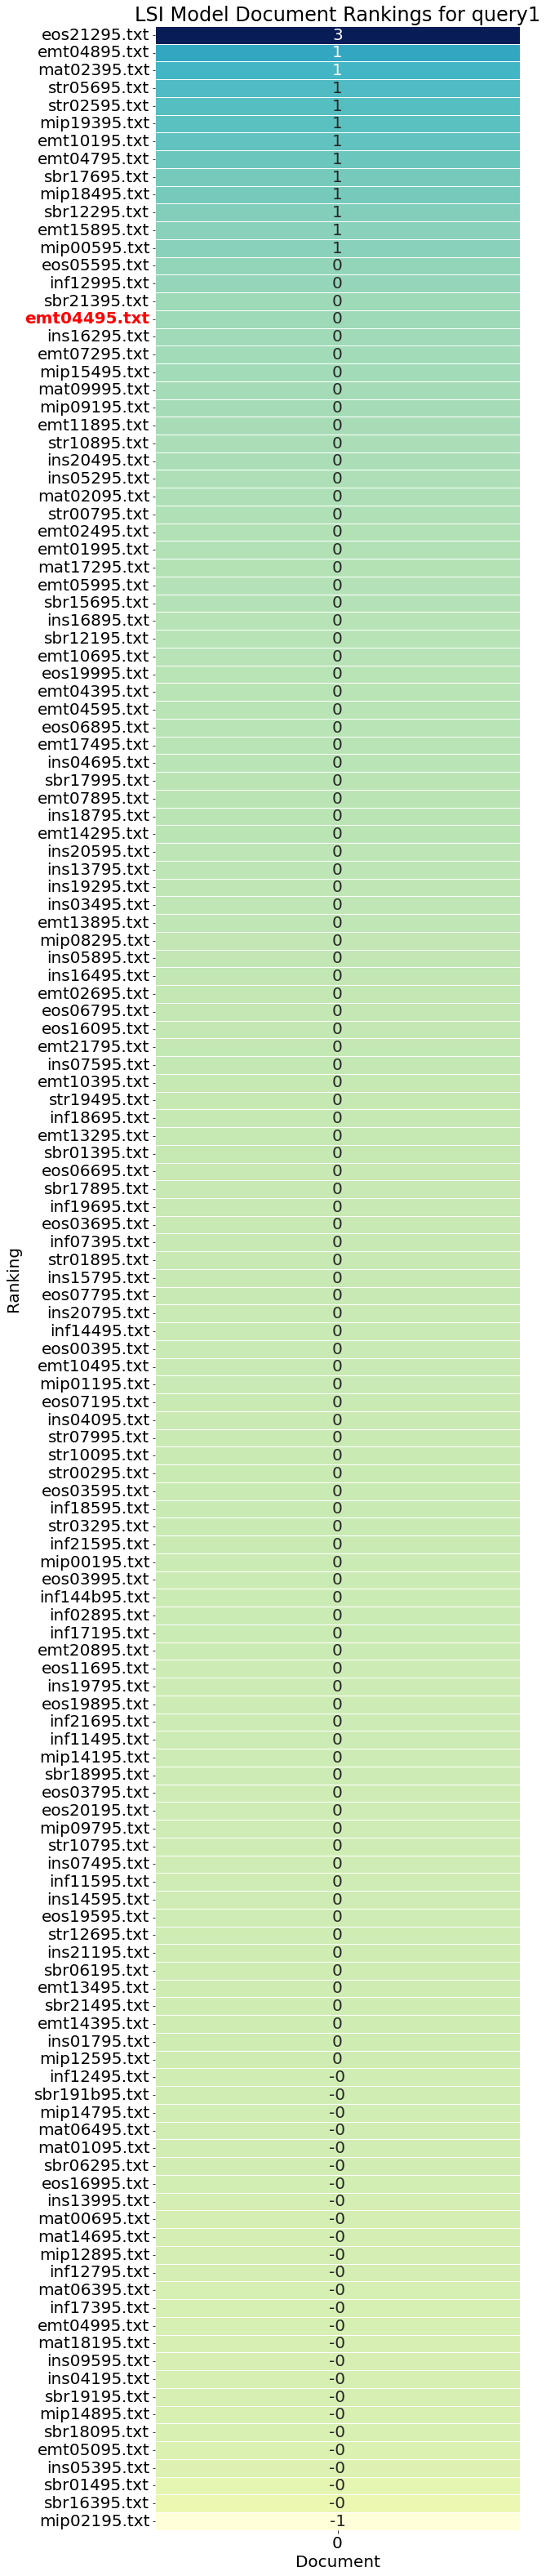

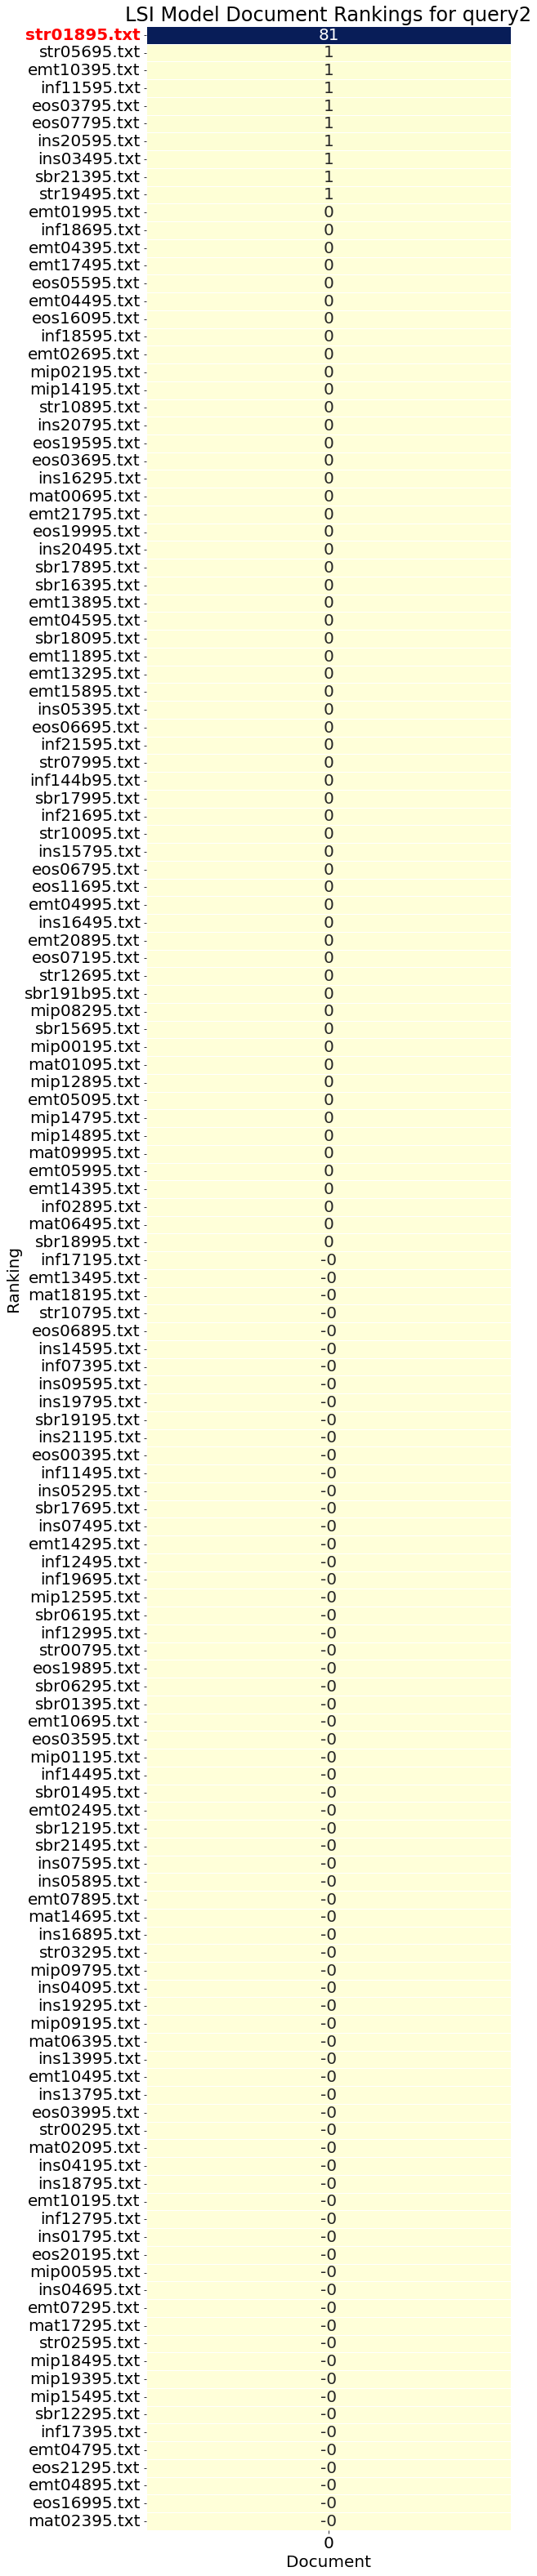

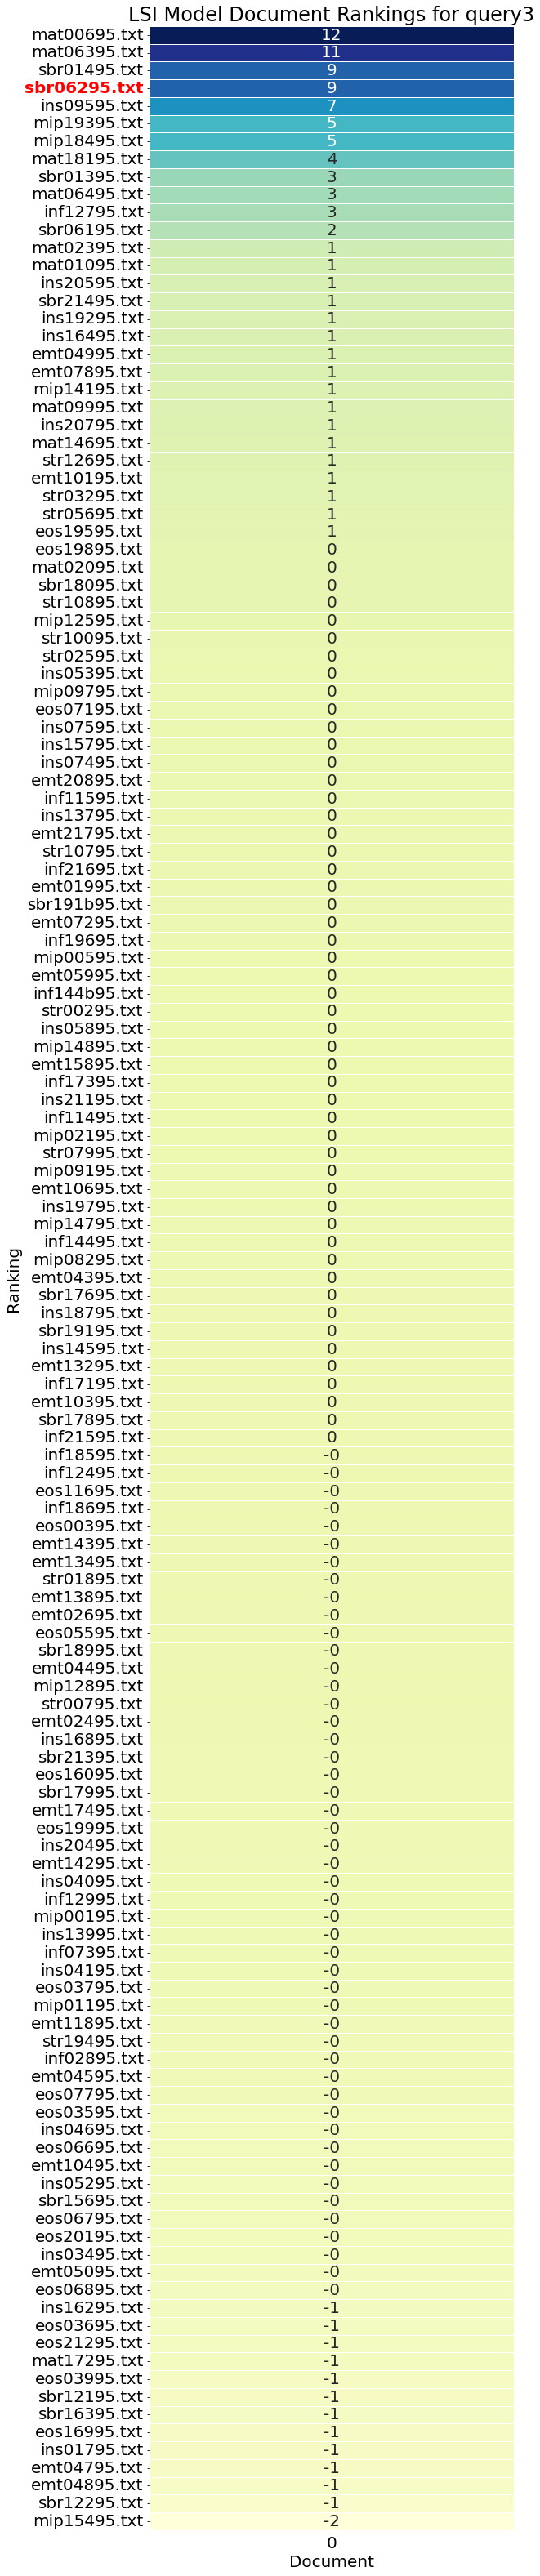

In [38]:
visualize_rankings(new_results_lsi, new_ranked_docs_dict_lsi, type="LSI")

In [39]:
# Get relevant documents and tokenized content of all documents
directory = "./nasa"
stop_words_path = "./english.stop"
rel_text_files = [new_results_lsi[key]["query"] for key in new_results_lsi]
for i, file_list in enumerate(rel_text_files):
    rel_text_files[i] = [directory + '/' + file for file in file_list]

text_files = get_text_files(directory, shuffle=False)
text = get_text(text_files)
tokenized_text = tokenization(text)
tokenized_text = remove_stopwords(stop_words_path, tokenized_text)
_, tokenized_text = stemmer(tokenized_text)

text_files = [text_file.split('/')[-1] for text_file in text_files]
documents = [' '.join(doc) for doc in tokenized_text]

In [40]:
# Ranked results of Probabilistic model using s queries
s = 3
directory = "./nasa"
new_results_prob = {}
new_ranked_docs_dict_prob = {}
for i in range(s):
    key = "query" + str(i + 1)
    query = results_prob[key]["query"]
    new_results_prob[key] = {"query": [file.split('/')[-1] for file in rel_text_files[i]]}
    new_results_prob[key]["prob_model"], ranked_docs = test_model_prob(documents, query, tfidf_vector_matrix_stop, text_files)
    new_ranked_docs_dict_prob[key] = ranked_docs
new_results_string_prob = json.dumps(new_results_prob, indent=4)
print(new_results_string_prob)

{
    "query1": {
        "query": [
            "emt04495.txt"
        ],
        "prob_model": {
            "ins15795.txt": 1,
            "emt15895.txt": 2,
            "ins20495.txt": 3,
            "inf12795.txt": 4,
            "sbr17695.txt": 5,
            "ins04195.txt": 6,
            "emt10195.txt": 7,
            "emt20895.txt": 8,
            "sbr16395.txt": 9,
            "mip14895.txt": 10,
            "emt13295.txt": 11,
            "ins13995.txt": 12,
            "sbr21395.txt": 13,
            "str07995.txt": 14,
            "ins07495.txt": 15,
            "inf02895.txt": 16,
            "inf17195.txt": 17,
            "sbr12295.txt": 18,
            "ins19295.txt": 19,
            "str10095.txt": 20,
            "sbr12195.txt": 21,
            "inf07395.txt": 22,
            "str05695.txt": 23,
            "eos21295.txt": 24,
            "emt04795.txt": 25,
            "ins07595.txt": 26,
            "eos19895.txt": 27,
            "mip15495.txt": 28,
            "i

/tmp/ipykernel_317218/2173864265.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  + np.log(((1 - self.P_not_R[i]) / self.P_not_R[i]) + 1e-10)
/tmp/ipykernel_317218/2173864265.py:39: RuntimeWarning: invalid value encountered in double_scalars
  self.weights[j] += tfidf * weight
/tmp/ipykernel_317218/2173864265.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  + np.log(((1 - self.P_not_R[i]) / self.P_not_R[i]) + 1e-10)
/tmp/ipykernel_317218/2173864265.py:39: RuntimeWarning: invalid value encountered in double_scalars
  self.weights[j] += tfidf * weight
/tmp/ipykernel_317218/2173864265.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  + np.log(((1 - self.P_not_R[i]) / self.P_not_R[i]) + 1e-10)
/tmp/ipykernel_317218/2173864265.py:39: RuntimeWarning: invalid value encountered in double_scalars
  self.weights[j] += tfidf * weight


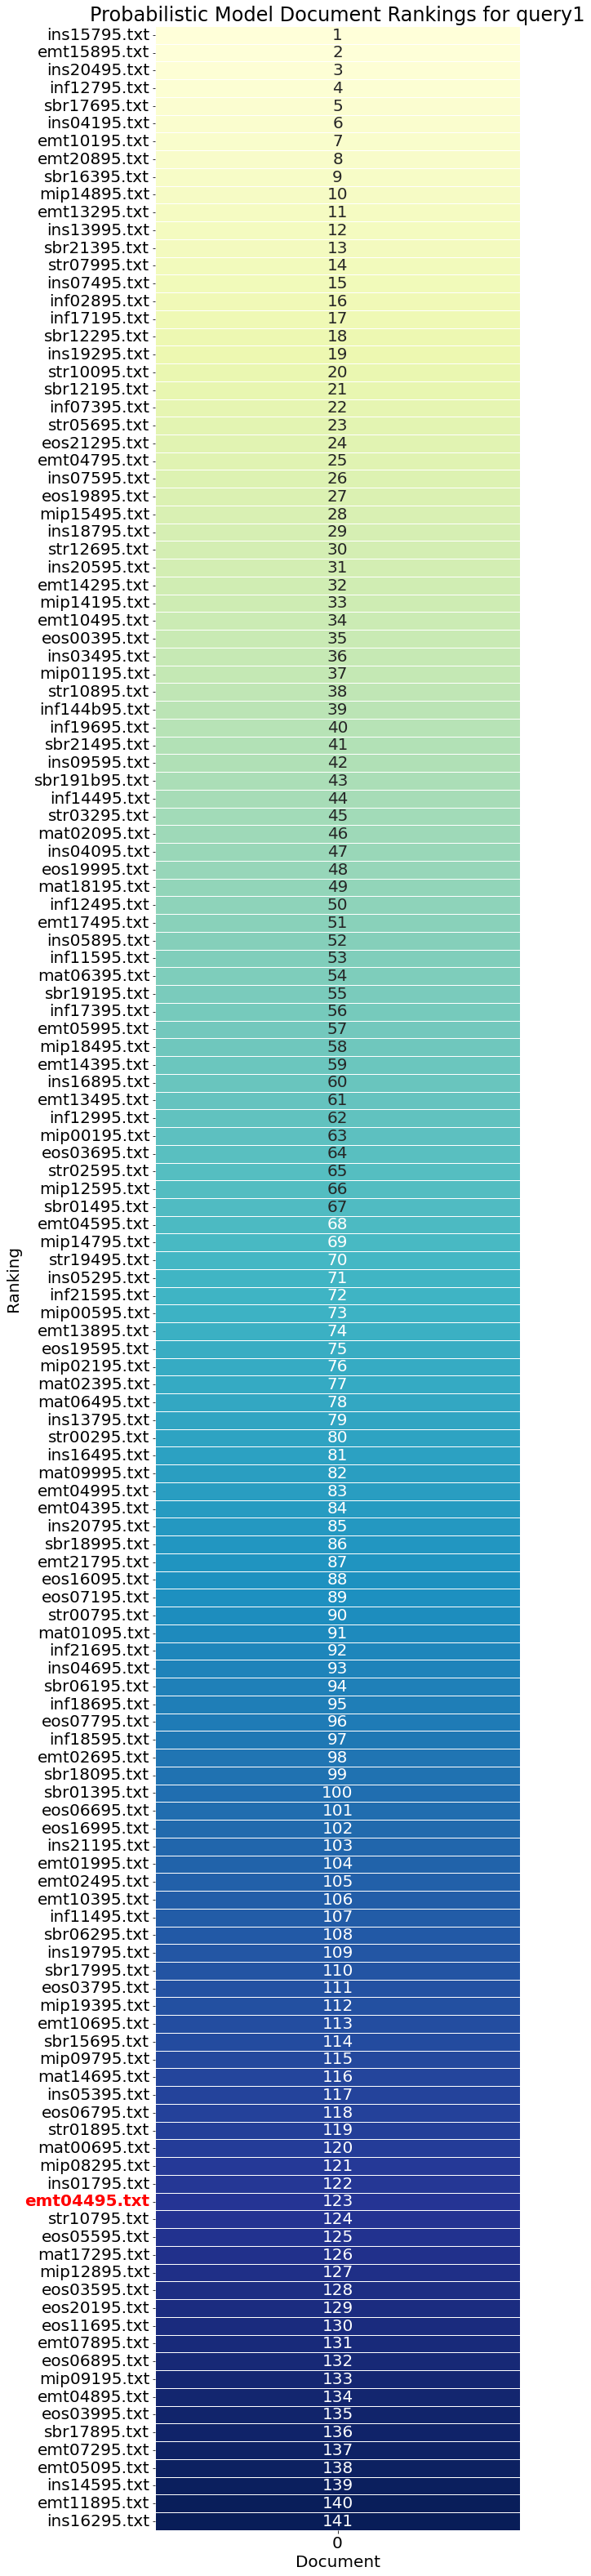

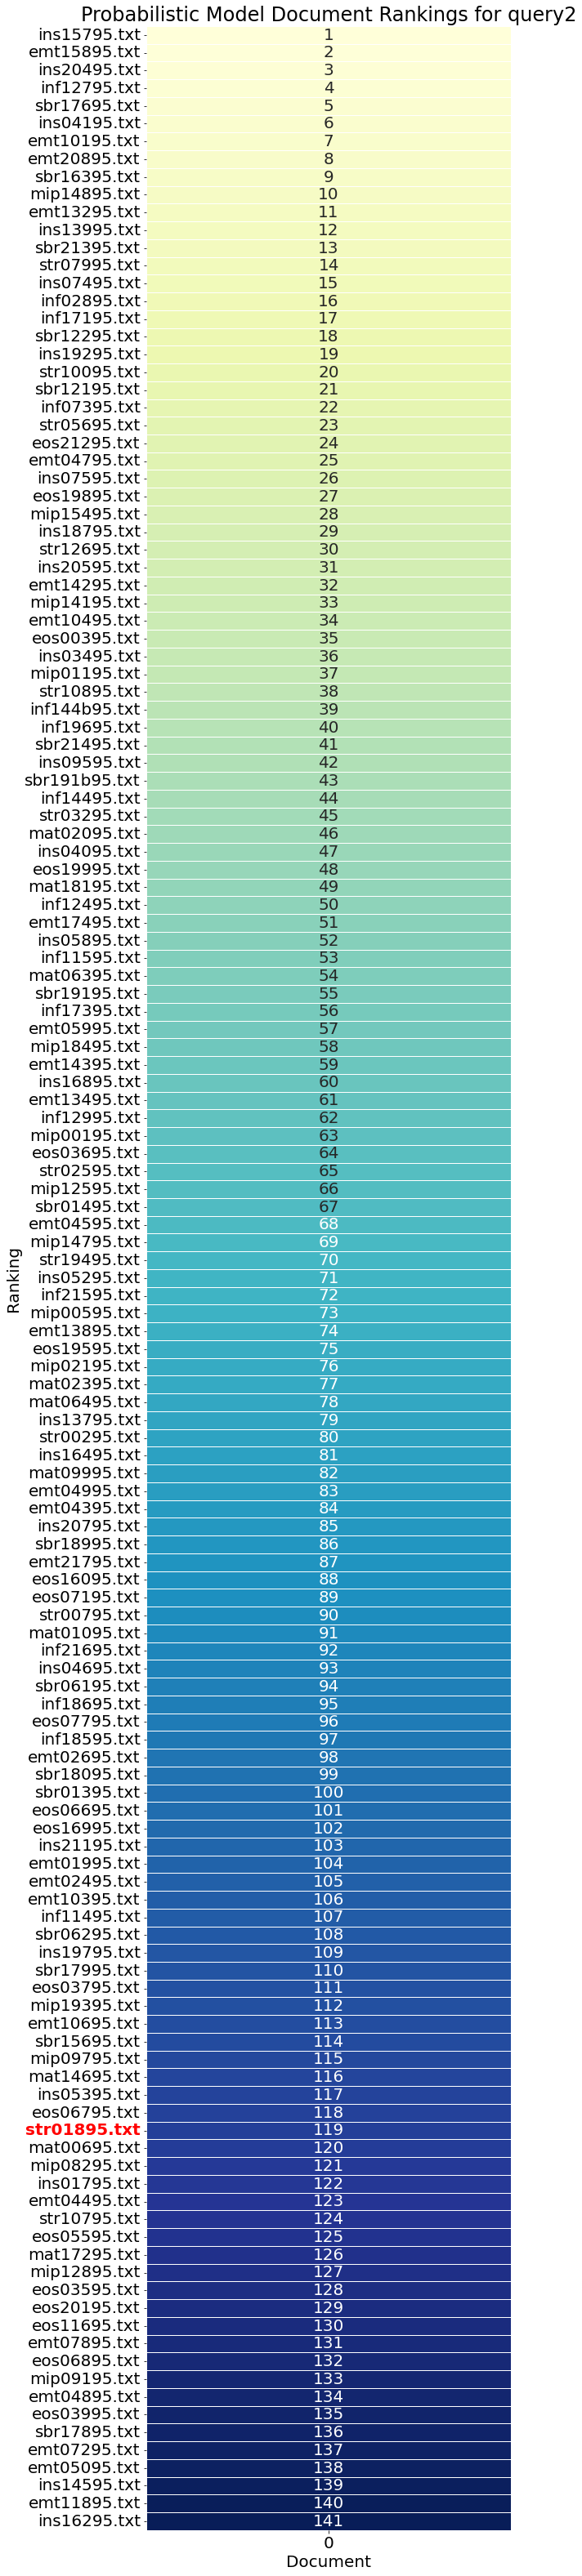

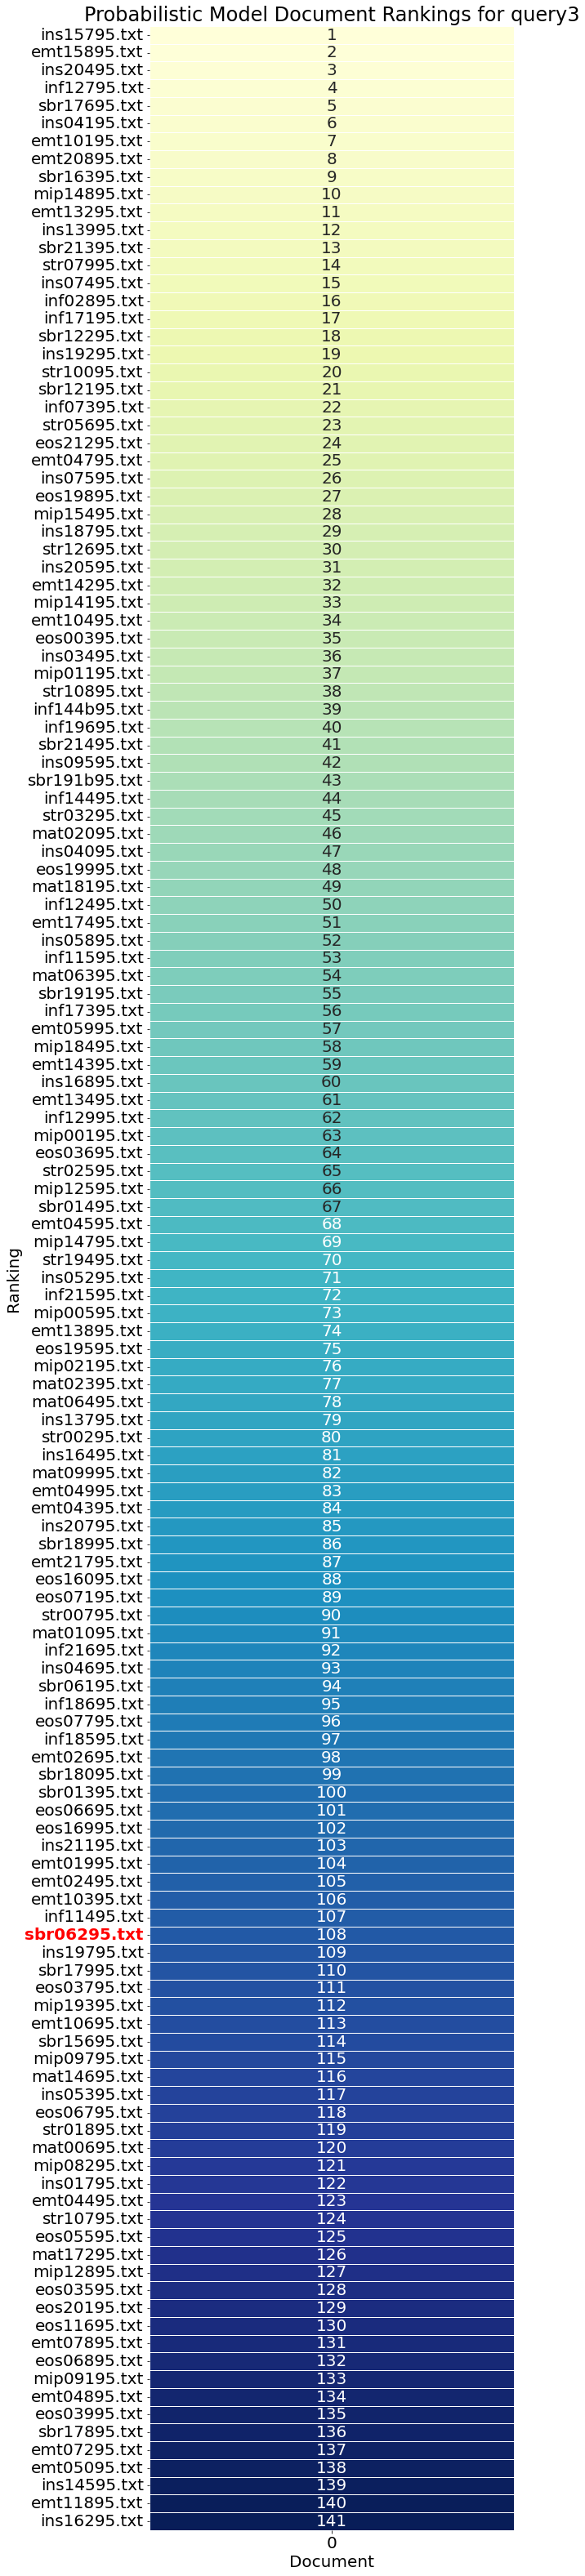

In [41]:
visualize_rankings(new_results_prob, new_ranked_docs_dict_prob, type="Probabilistic")

### Comparison Between LSI and Probabilistic Models

In [42]:
new_model_comparison = {}
for key in new_results_lsi:
    new_model_comparison[key] = {"query": new_results_lsi[key]["query"]}
    for file in new_model_comparison[key]["query"]:
        new_model_comparison[key][file] = {"lsi_model": new_results_lsi[key]["lsi_model"][file], "prob_model": new_results_prob[key]["prob_model"][file]}
new_model_comparison_string = json.dumps(new_model_comparison, indent=4)
print(new_model_comparison_string)

{
    "query1": {
        "query": [
            "emt04495.txt"
        ],
        "emt04495.txt": {
            "lsi_model": 17,
            "prob_model": 123
        }
    },
    "query2": {
        "query": [
            "str01895.txt"
        ],
        "str01895.txt": {
            "lsi_model": 1,
            "prob_model": 119
        }
    },
    "query3": {
        "query": [
            "sbr06295.txt"
        ],
        "sbr06295.txt": {
            "lsi_model": 4,
            "prob_model": 108
        }
    }
}


### Ranking comparison with and without stop words

In [43]:
print(f"With Stop Words\n{model_comparison_string}\n")
print(f"Without Stop Words\n{new_model_comparison_string}")

With Stop Words
{
    "query1": {
        "query": [
            "emt04495.txt"
        ],
        "emt04495.txt": {
            "lsi_model": 2,
            "prob_model": 1
        }
    },
    "query2": {
        "query": [
            "str01895.txt"
        ],
        "str01895.txt": {
            "lsi_model": 101,
            "prob_model": 1
        }
    },
    "query3": {
        "query": [
            "sbr06295.txt"
        ],
        "sbr06295.txt": {
            "lsi_model": 2,
            "prob_model": 1
        }
    }
}

Without Stop Words
{
    "query1": {
        "query": [
            "emt04495.txt"
        ],
        "emt04495.txt": {
            "lsi_model": 17,
            "prob_model": 123
        }
    },
    "query2": {
        "query": [
            "str01895.txt"
        ],
        "str01895.txt": {
            "lsi_model": 1,
            "prob_model": 119
        }
    },
    "query3": {
        "query": [
            "sbr06295.txt"
        ],
        "sbr06295.t

## Practical Requirements

In [44]:
def complete_boolean_model(df: pd.DataFrame):
    docs = df.columns.values.tolist()
    terms = df.index.values.tolist()
    boolean_matrix = pd.DataFrame(0, index=terms, columns=docs)
    for doc in docs:
        for term in terms:
            if df.loc[term, doc] > 0:
                boolean_matrix.loc[term, doc] = 1
    return boolean_matrix

def TermDocumentMatrixProbModel(directory: str, stop_words_path: str, stemming=False):
    text_files = get_text_files(directory, shuffle=False)
    text = get_text(text_files)
    tokenized_text = tokenization(text)
    tokenized_text = remove_stopwords(stop_words_path, tokenized_text)
    if stemming:
        _, tokenized_text = stemmer(tokenized_text)
    text_files = [text_file.split('/')[-1] for text_file in text_files]
    tf_dict = get_tf_dict(tokenized_text, text_files, stemming=stemming)
    tf_matrix = get_tf_matrix(tf_dict)
    boolean_matrix = complete_boolean_model(tf_matrix)
    return boolean_matrix

def TermDocumentMatrixLatentSemanticIndexing(directory: str, stop_words_path: str, stemming=False, num_eigen=0):
    text_files = get_text_files(directory, shuffle=False)
    text = get_text(text_files)
    tokenized_text = tokenization(text)
    tokenized_text = remove_stopwords(stop_words_path, tokenized_text)
    if stemming:
        _, tokenized_text = stemmer(tokenized_text)
    text_files = [text_file.split('/')[-1] for text_file in text_files]
    tf_dict = get_tf_dict(tokenized_text, text_files, stemming=stemming)
    tf_matrix = get_tf_matrix(tf_dict)
    idf_dict = get_idf_dict(tokenized_text, text_files, stemming=stemming)
    tfidf_matrix = get_tf_idf_matrix(tf_matrix, idf_dict)
    tdm = tfidf_matrix.to_numpy()
    if num_eigen == 0:
        num_eigen = min(tdm.shape)
    U, s, Vh = np.linalg.svd(tdm)
    U, s, Vh = U[:, :num_eigen], s[:num_eigen], Vh[:num_eigen, :]
    S = np.diag(s)
    M = U @ S @ Vh
    model = M.T @ M
    model = pd.DataFrame(model, index=text_files, columns=text_files)
    return model

def RankingLatentSemanticIndexing(query: list, model: pd.DataFrame, display=False, N=0):
    ranked_docs = retrieval_lsi(query, model)
    if N > 0:
        ranked_docs = ranked_docs[:N]
    if display:
        display_result_lsi(query, ranked_docs)
    result = {}
    i = 1
    for doc in ranked_docs.index.values.tolist():
        result[doc] = i
        i += 1
    return result, ranked_docs

def queryBooleanRepresentationProbModel(query: list, vocabulary: list):
    query_terms = set(query)
    query_vector = {}
    for term in vocabulary:
        if term in query_terms:
            query_vector[term] = 1
        else:
            query_vector[term] = 0
    return pd.Series(query_vector)

def RankingProbModel(query, docs):
    return None

In [45]:
directory = "./nasa"
stop_words_path = "./english.stop"
boolean_matrix = TermDocumentMatrixProbModel(directory, stop_words_path, stemming=True)
boolean_matrix.head()

ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
miniatur               1             0             0             0   
electron               1             0             0             0   
temperatur             1             0             1             0   
control                1             1             0             0   
develop                1             1             1             1   

            sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
miniatur               0             0             0             0   
electron               1             0             0             0   
temperatur             0             0             0             0   
control                1             0             0             1   
develop                1             1             1             1   

            sbr16395.txt  mip14895.txt  ...  eos06895.txt  mip09195.txt  \
miniatur               0             0  ...             0             0   
electron               0             0  ...             0             0   
temperatur             0             1  ...             1             0   
control                0             0  ...             0             1   
develop                1             1  ...             1             1   

            emt04895.txt  eos03995.txt  sbr17895.txt  emt07295.txt  \
miniatur               0             0             0             0   
electron               0             0             0             0   
temperatur             0             0             0             0   
control                0             0             1             1   
develop                1             1             1             1   

            emt05095.txt  ins14595.txt  emt11895.txt  ins16295.txt  
miniatur               0             0             0             0  
electron               0             0             0             0  
temperatur             0             0             0             0  
control                0             0             0             0  
develop                1             1             1             1  

[5 rows x 141 columns]

In [46]:
lsi_model = TermDocumentMatrixLatentSemanticIndexing(directory, stop_words_path, stemming=True, num_eigen=20)
lsi_model.head()

ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
ins15795.txt      0.701140      0.857279      0.764326      0.363552   
emt15895.txt      0.857279      3.828751      1.640639      1.756000   
ins20495.txt      0.764326      1.640639      1.519848      2.925054   
inf12795.txt      0.363552      1.756000      2.925054    109.464568   
sbr17695.txt      1.009037      7.610890      3.263977      1.213966   

              sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
ins15795.txt      1.009037      1.696146      0.014933      2.034851   
emt15895.txt      7.610890      2.739207      3.890308      5.271413   
ins20495.txt      3.263977      0.819535      2.242834      3.575088   
inf12795.txt      1.213966      0.494711      1.701249      4.261202   
sbr17695.txt     46.948135     -2.260274     15.956684      4.418438   

              sbr16395.txt  mip14895.txt  ...  eos06895.txt  mip09195.txt  \
ins15795.txt      0.522145      1.850864  ...      0.979074      0.590934   
emt15895.txt     -0.394630     -0.114343  ...      0.805238      2.039251   
ins20495.txt      0.249098      0.357585  ...      1.248980      0.699004   
inf12795.txt      1.604154      0.707778  ...      0.264562      0.335325   
sbr17695.txt      2.940276      5.753330  ...      1.636298      0.894375   

              emt04895.txt  eos03995.txt  sbr17895.txt  emt07295.txt  \
ins15795.txt      0.680267      1.004561      0.479934      0.769773   
emt15895.txt      3.288301      0.843765      1.319911      3.434617   
ins20495.txt      1.838123      1.298760      0.813620      2.245483   
inf12795.txt      0.234743     -0.330660      0.706055     -0.231132   
sbr17695.txt      9.225996     -5.015788      2.893271      2.680552   

              emt05095.txt  ins14595.txt  emt11895.txt  ins16295.txt  
ins15795.txt      0.271522      0.447912      0.632704      0.873759  
emt15895.txt      1.503553      0.824507      2.696944      0.450014  
ins20495.txt      2.248817      0.536874      1.592186      0.837825  
inf12795.txt      1.351122      0.736569      0.573732     -0.251756  
sbr17695.txt      2.192230      1.342578     13.410865     -1.428124  

[5 rows x 141 columns]

In [47]:

# LSI query ranking
N = 10
query = get_query_lsi(directory, 1)
result, ranked_docs = RankingLatentSemanticIndexing(query, lsi_model, display=True, N=N)

Query
['mip14895.txt']

Document mip14895.txt with score 73.79467071966117 is at rank 1
Document mip14795.txt with score 10.505055033395497 is at rank 2
Document sbr21495.txt with score 10.17081850780044 is at rank 3
Document inf19695.txt with score 8.796847351011314 is at rank 4
Document ins05295.txt with score 8.161613971121849 is at rank 5
Document eos07195.txt with score 7.567681523717896 is at rank 6
Document emt21795.txt with score 7.003594609781711 is at rank 7
Document ins07495.txt with score 6.8207324188377045 is at rank 8
Document mip09795.txt with score 6.3032232491914195 is at rank 9
Document ins16295.txt with score 5.754917471433181 is at rank 10

Query document mip14895.txt is at rank 1


In [48]:
vocabulary = boolean_matrix.index.values.tolist()
query, relevant_docs = get_query(directory, N=1, stemming=True)
query_boolean = queryBooleanRepresentationProbModel(query, vocabulary)
print(query_boolean)

miniatur      0
electron      1
temperatur    0
control       0
develop       0
             ..
reignit       0
petroleum     0
restart       0
render        0
prece         0
Length: 3733, dtype: int64
